In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/optimising-revenue-dataset/PS2/fact_aggregated_bookings.csv
/kaggle/input/optimising-revenue-dataset/PS2/dim_hotels.csv
/kaggle/input/optimising-revenue-dataset/PS2/dim_rooms.csv
/kaggle/input/optimising-revenue-dataset/PS2/dim_date.csv
/kaggle/input/optimising-revenue-dataset/PS2/fact_bookings.csv
/kaggle/input/fact-bookings-imputed/Bookings Imputed.csv


# Exploring DataFrames

In [2]:
dim_date = pd.read_csv("/kaggle/input/optimising-revenue-dataset/PS2/dim_date.csv")
dim_hotels = pd.read_csv("/kaggle/input/optimising-revenue-dataset/PS2/dim_hotels.csv")
dim_rooms = pd.read_csv("/kaggle/input/optimising-revenue-dataset/PS2/dim_rooms.csv")
fact_aggregated_bookings = pd.read_csv("/kaggle/input/optimising-revenue-dataset/PS2/fact_aggregated_bookings.csv")
fact_bookings = pd.read_csv("/kaggle/input/optimising-revenue-dataset/PS2/fact_bookings.csv")

In [3]:
dataframes = [dim_date,dim_hotels,dim_rooms,fact_aggregated_bookings,fact_bookings]

In [4]:
for i in dataframes:
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 932.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   room_id     4 non-nu

In [5]:
for i in dataframes:
    print(i.head(10))
    print("\n")

        date  mmm yy week no  day_type
0  01-May-22  May 22    W 19   weekend
1  02-May-22  May 22    W 19  weekeday
2  03-May-22  May 22    W 19  weekeday
3  04-May-22  May 22    W 19  weekeday
4  05-May-22  May 22    W 19  weekeday
5  06-May-22  May 22    W 19  weekeday
6  07-May-22  May 22    W 19   weekend
7  08-May-22  May 22    W 20   weekend
8  09-May-22  May 22    W 20  weekeday
9  10-May-22  May 22    W 20  weekeday


   property_id  property_name  category    city
0        16558   Atliq Grands    Luxury   Delhi
1        16559  Atliq Exotica    Luxury  Mumbai
2        16560     Atliq City  Business   Delhi
3        16561      Atliq Blu    Luxury   Delhi
4        16562      Atliq Bay    Luxury   Delhi
5        16563   Atliq Palace  Business   Delhi
6        17558   Atliq Grands    Luxury  Mumbai
7        17559  Atliq Exotica    Luxury  Mumbai
8        17560     Atliq City  Business  Mumbai
9        17561      Atliq Blu    Luxury  Mumbai


  room_id    room_class
0     RT1      

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


# Fixing Problems with Data

**dim_rooms needs conversion of room_id and room_class into category**

In [6]:
dim_rooms["room_id"] = dim_rooms["room_id"].astype("category")
dim_rooms["room_class"] = dim_rooms["room_class"].astype("category")

**dim_hotels needs to convert city and category into category format**

In [7]:
dim_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 932.0+ bytes


In [8]:
dim_hotels["category"]=dim_hotels["category"].astype("category")
dim_hotels["city"]=dim_hotels["city"].astype("category")

In [9]:
dim_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   property_id    25 non-null     int64   
 1   property_name  25 non-null     object  
 2   category       25 non-null     category
 3   city           25 non-null     category
dtypes: category(2), int64(1), object(1)
memory usage: 910.0+ bytes


**dim_date table needs corrected date format, delete its "mm yy" column (data redundancy), removing w from each row of week number and convert into integer, day_type should be converted into category**

In [10]:
dim_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [11]:
dim_date["date"] = pd.to_datetime(dim_date["date"])

/tmp/ipykernel_13/2463475100.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dim_date["date"] = pd.to_datetime(dim_date["date"])


In [12]:
dim_date.drop(["mmm yy", "week no"], axis = 1, inplace =True)

In [13]:
dim_date.rename({"day_type":"Weekend"}, axis = 1, inplace = True)

In [14]:
dim_date["Weekend"] = np.where(dim_date["Weekend"].isin(["weekend"]),1,0)

In [15]:
dim_date["Weekend"].value_counts()

Weekend
0    65
1    27
Name: count, dtype: int64

In [16]:
dim_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     92 non-null     datetime64[ns]
 1   Weekend  92 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


**fact_aggregated_bookings needs check-in date into corrected date format, room_category into category type**

In [17]:
fact_aggregated_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_id          9200 non-null   int64 
 1   check_in_date        9200 non-null   object
 2   room_category        9200 non-null   object
 3   successful_bookings  9200 non-null   int64 
 4   capacity             9200 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 359.5+ KB


In [18]:
fact_aggregated_bookings["check_in_date"] = pd.to_datetime(fact_aggregated_bookings["check_in_date"])
fact_aggregated_bookings["room_category"] = fact_aggregated_bookings["room_category"].astype("category")

/tmp/ipykernel_13/261419033.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fact_aggregated_bookings["check_in_date"] = pd.to_datetime(fact_aggregated_bookings["check_in_date"])


In [19]:
fact_aggregated_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          9200 non-null   int64         
 1   check_in_date        9200 non-null   datetime64[ns]
 2   room_category        9200 non-null   category      
 3   successful_bookings  9200 non-null   int64         
 4   capacity             9200 non-null   int64         
dtypes: category(1), datetime64[ns](1), int64(3)
memory usage: 296.8 KB


**fact_bookings has missing values in ratings_given column, booking & checkin & checkout dates must be converted into date type, room_category & booking_platform & booking_status into category**

In [20]:
fact_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  int64  
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 12.3+ MB


In [21]:
fact_bookings.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [22]:
fact_bookings["booking_date"] = pd.to_datetime(fact_bookings["booking_date"])
fact_bookings["check_in_date"] = pd.to_datetime(fact_bookings["check_in_date"])
fact_bookings["checkout_date"] = pd.to_datetime(fact_bookings["checkout_date"])

In [23]:
fact_bookings[["room_category","booking_platform","booking_status"]] = fact_bookings[["room_category","booking_platform","booking_status"]].astype("category")

In [24]:
fact_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134590 non-null  object        
 1   property_id        134590 non-null  int64         
 2   booking_date       134590 non-null  datetime64[ns]
 3   check_in_date      134590 non-null  datetime64[ns]
 4   checkout_date      134590 non-null  datetime64[ns]
 5   no_guests          134590 non-null  int64         
 6   room_category      134590 non-null  category      
 7   booking_platform   134590 non-null  category      
 8   ratings_given      56683 non-null   float64       
 9   booking_status     134590 non-null  category      
 10  revenue_generated  134590 non-null  int64         
 11  revenue_realized   134590 non-null  int64         
dtypes: category(3), datetime64[ns](3), float64(1), int64(4), object(1)
memory usage: 9.6+ MB


Since ratings_given is just 58% filled, we cannot fill it with simple imputation methods like mean imputation. We will use RandomForest inputation here (fast and accurate). This uses RandomForest module on its backend to predict what people might have given ratings to the property.

In [25]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

df_minimal = fact_bookings[['property_id', 'room_category', 
                           'revenue_realized', 'no_guests', 'ratings_given']].copy()

df_minimal['room_category_encoded'] = pd.Categorical(fact_bookings['room_category']).codes
df_minimal.drop('room_category', axis=1, inplace=True)

limited_rf_imputer = IterativeImputer(
    estimator=RandomForestRegressor(
        n_estimators=15,
        max_depth=8,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='auto',
        n_jobs=-1,
        random_state=42
    ),
    max_iter=1,
    random_state=42,
    initial_strategy='median'
)

X_imputed = limited_rf_imputer.fit_transform(df_minimal)

fact_bookings['ratings_given'] = X_imputed[:, -1]

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

In [26]:
fact_aggregated_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,2022-05-01,RT1,25,30
1,19562,2022-05-01,RT1,28,30
2,19563,2022-05-01,RT1,23,30
3,17558,2022-05-01,RT1,13,19
4,16558,2022-05-01,RT1,18,19


In [27]:
room_mapping = {
    'RT1': 'Standard',
    'RT2': 'Elite', 
    'RT3': 'Premium',
    'RT4': 'Presidential'
}

fact_aggregated_bookings['room_category'] = fact_aggregated_bookings['room_category'].map(room_mapping)
fact_bookings['room_category'] = fact_bookings['room_category'].map(room_mapping)

# Merging all the Dataframes together into a single DataFrame and extracting out some more features from it

In [28]:
# Rename columns category and city
dim_hotels = dim_hotels.rename(columns={
    'category': 'property_category', 
    'city': 'property_city'})

In [29]:
# Merge fact_bookings with renamed_dim_hotels on property_id with left join
fact_bookings = fact_bookings.merge(dim_hotels, how='left', on='property_id')
# Merge fact_aggregated_bookings with renamed_dim_hotels on property_id with left join
fact_aggregated_bookings = fact_aggregated_bookings.merge(dim_hotels, how='left', on='property_id')

In [30]:
fact_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134590 non-null  object        
 1   property_id        134590 non-null  int64         
 2   booking_date       134590 non-null  datetime64[ns]
 3   check_in_date      134590 non-null  datetime64[ns]
 4   checkout_date      134590 non-null  datetime64[ns]
 5   no_guests          134590 non-null  int64         
 6   room_category      134590 non-null  category      
 7   booking_platform   134590 non-null  category      
 8   ratings_given      134590 non-null  float64       
 9   booking_status     134590 non-null  category      
 10  revenue_generated  134590 non-null  int64         
 11  revenue_realized   134590 non-null  int64         
 12  property_name      134590 non-null  object        
 13  property_category  134590 non-null  category

In [31]:
fact_aggregated_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          9200 non-null   int64         
 1   check_in_date        9200 non-null   datetime64[ns]
 2   room_category        9200 non-null   category      
 3   successful_bookings  9200 non-null   int64         
 4   capacity             9200 non-null   int64         
 5   property_name        9200 non-null   object        
 6   property_category    9200 non-null   category      
 7   property_city        9200 non-null   category      
dtypes: category(3), datetime64[ns](1), int64(3), object(1)
memory usage: 387.0+ KB


# New Features Required in the Dataframe
    •	`day_of_week` = extract weekday from check_in_date
	•	`is_weekend` = boolean flag for weekend vs weekday
	•	`booking_count` = count of successful bookings by room type and day type

    •	`occupancy_rate` = successful_bookings / capacity
	•	`month_year` = extract from check_in_date for seasonal grouping
	•	`total_revenue` = sum of revenue_realized by time period

	•	`revenue_gap` = revenue_generated - revenue_realized (potential indicator of service losses)
	•	`revenue_per_guest` = revenue_realized / no_guests
	•	`service_utilization_proxy` = analysis of revenue patterns by property/room type

	•	`stay_duration` = checkout_date - check_in_date
	•	`spending_per_guest` = revenue_realized / no_guests
	•	`spending_per_night` = revenue_realized / stay_duration
	•	`customer_value_tier` = categorization based on total spending
	•	`average_spending_by_platform` = group analysis by booking channel

In [32]:
fact_bookings['booking_date'] = pd.to_datetime(fact_bookings['booking_date'])
fact_bookings['check_in_date'] = pd.to_datetime(fact_bookings['check_in_date'])
fact_bookings['checkout_date'] = pd.to_datetime(fact_bookings['checkout_date'])

fact_bookings['day_of_week_checkin'] = fact_bookings['check_in_date'].dt.dayofweek
fact_bookings['is_weekend_checkin'] = fact_bookings['day_of_week_checkin'].isin([5, 6])
fact_bookings['day_name_checkin'] = fact_bookings['check_in_date'].dt.day_name()

fact_bookings['month_year'] = fact_bookings['check_in_date'].dt.to_period('M')
fact_bookings['quarter'] = fact_bookings['check_in_date'].dt.quarter
fact_bookings['month_name'] = fact_bookings['check_in_date'].dt.month_name()
fact_bookings['week_number'] = fact_bookings['check_in_date'].dt.isocalendar().week

fact_bookings['revenue_gap'] = fact_bookings['revenue_generated'] - fact_bookings['revenue_realized']
fact_bookings['revenue_realization_rate'] = fact_bookings['revenue_realized'] / fact_bookings['revenue_generated']
fact_bookings['revenue_per_guest'] = fact_bookings['revenue_realized'] / fact_bookings['no_guests']

fact_bookings['stay_duration'] = (fact_bookings['checkout_date'] - fact_bookings['check_in_date']).dt.days
fact_bookings['spending_per_guest_per_night'] = fact_bookings['revenue_realized'] / (fact_bookings['no_guests'] * fact_bookings['stay_duration'])
fact_bookings['booking_lead_time'] = (fact_bookings['check_in_date'] - fact_bookings['booking_date']).dt.days
fact_bookings['same_day_booking'] = fact_bookings['booking_lead_time'] == 0
fact_bookings['guest_density'] = fact_bookings['no_guests']

fact_bookings['revenue_per_guest_quartile'] = pd.qcut(fact_bookings['revenue_per_guest'], q=4, labels=['Low_Value', 'Medium_Value', 'High_Value', 'Premium_Value'])
fact_bookings['stay_duration_category'] = pd.cut(fact_bookings['stay_duration'], bins=[0, 1, 3, 7, float('inf')], labels=['Short_Stay', 'Medium_Stay', 'Extended_Stay', 'Long_Stay'])
fact_bookings['advance_booking'] = fact_bookings['booking_lead_time'] > 7
fact_bookings['last_minute_booking'] = fact_bookings['booking_lead_time'] <= 1

fact_bookings['adr_per_guest'] = fact_bookings['revenue_realized'] / (fact_bookings['no_guests'] * fact_bookings['stay_duration'])
fact_bookings['is_successful_booking'] = fact_bookings['booking_status'] == 'Checked Out'
fact_bookings['high_rating'] = fact_bookings['ratings_given'] >= 4.0

fact_bookings.shape

(134590, 37)

In [33]:
fact_aggregated_bookings['check_in_date'] = pd.to_datetime(fact_aggregated_bookings['check_in_date'])

fact_aggregated_bookings['occupancy_rate'] = fact_aggregated_bookings['successful_bookings'] / fact_aggregated_bookings['capacity']
fact_aggregated_bookings['capacity_utilization_pct'] = fact_aggregated_bookings['occupancy_rate'] * 100
fact_aggregated_bookings['unused_capacity'] = fact_aggregated_bookings['capacity'] - fact_aggregated_bookings['successful_bookings']

fact_aggregated_bookings['month_year'] = fact_aggregated_bookings['check_in_date'].dt.to_period('M')
fact_aggregated_bookings['day_of_week'] = fact_aggregated_bookings['check_in_date'].dt.dayofweek
fact_aggregated_bookings['is_weekend'] = fact_aggregated_bookings['day_of_week'].isin([5, 6])
fact_aggregated_bookings['day_name'] = fact_aggregated_bookings['check_in_date'].dt.day_name()
fact_aggregated_bookings['quarter'] = fact_aggregated_bookings['check_in_date'].dt.quarter
fact_aggregated_bookings['month_name'] = fact_aggregated_bookings['check_in_date'].dt.month_name()
fact_aggregated_bookings['week_number'] = fact_aggregated_bookings['check_in_date'].dt.isocalendar().week

fact_aggregated_bookings['high_occupancy'] = fact_aggregated_bookings['occupancy_rate'] > 0.8
fact_aggregated_bookings['low_occupancy'] = fact_aggregated_bookings['occupancy_rate'] < 0.5
fact_aggregated_bookings['at_full_capacity'] = fact_aggregated_bookings['occupancy_rate'] >= 1.0

def create_room_performance_features(df):
    room_avg_occupancy = df.groupby('room_category')['occupancy_rate'].transform('mean')
    df['room_category_avg_occupancy'] = room_avg_occupancy
    df['occupancy_vs_room_avg'] = df['occupancy_rate'] - df['room_category_avg_occupancy']
    df['room_performance_rank'] = df.groupby(['property_id', 'check_in_date'])['occupancy_rate'].rank(ascending=False)
    return df

fact_aggregated_bookings = create_room_performance_features(fact_aggregated_bookings)

fact_aggregated_bookings.shape

/tmp/ipykernel_13/3478592517.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  room_avg_occupancy = df.groupby('room_category')['occupancy_rate'].transform('mean')


(9200, 24)

In [34]:
fact_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 37 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   booking_id                    134590 non-null  object        
 1   property_id                   134590 non-null  int64         
 2   booking_date                  134590 non-null  datetime64[ns]
 3   check_in_date                 134590 non-null  datetime64[ns]
 4   checkout_date                 134590 non-null  datetime64[ns]
 5   no_guests                     134590 non-null  int64         
 6   room_category                 134590 non-null  category      
 7   booking_platform              134590 non-null  category      
 8   ratings_given                 134590 non-null  float64       
 9   booking_status                134590 non-null  category      
 10  revenue_generated             134590 non-null  int64         
 11  revenue_reali

In [35]:
# This exists in fact_aggregated_bookings
fact_aggregated_bookings['occupancy_rate'] = fact_aggregated_bookings['successful_bookings'] / fact_aggregated_bookings['capacity']

Setup and Data Verification

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
sns.set_context("notebook", font_scale=1.1)

# Check available columns
print("=== AVAILABLE COLUMNS CHECK ===")
print(f"fact_bookings columns: {len(fact_bookings.columns)}")
print(f"fact_aggregated_bookings columns: {len(fact_aggregated_bookings.columns)}")


=== AVAILABLE COLUMNS CHECK ===
fact_bookings columns: 37
fact_aggregated_bookings columns: 24


1. Room and Service Performance Analysis

=== ROOM PERFORMANCE ANALYSIS ===


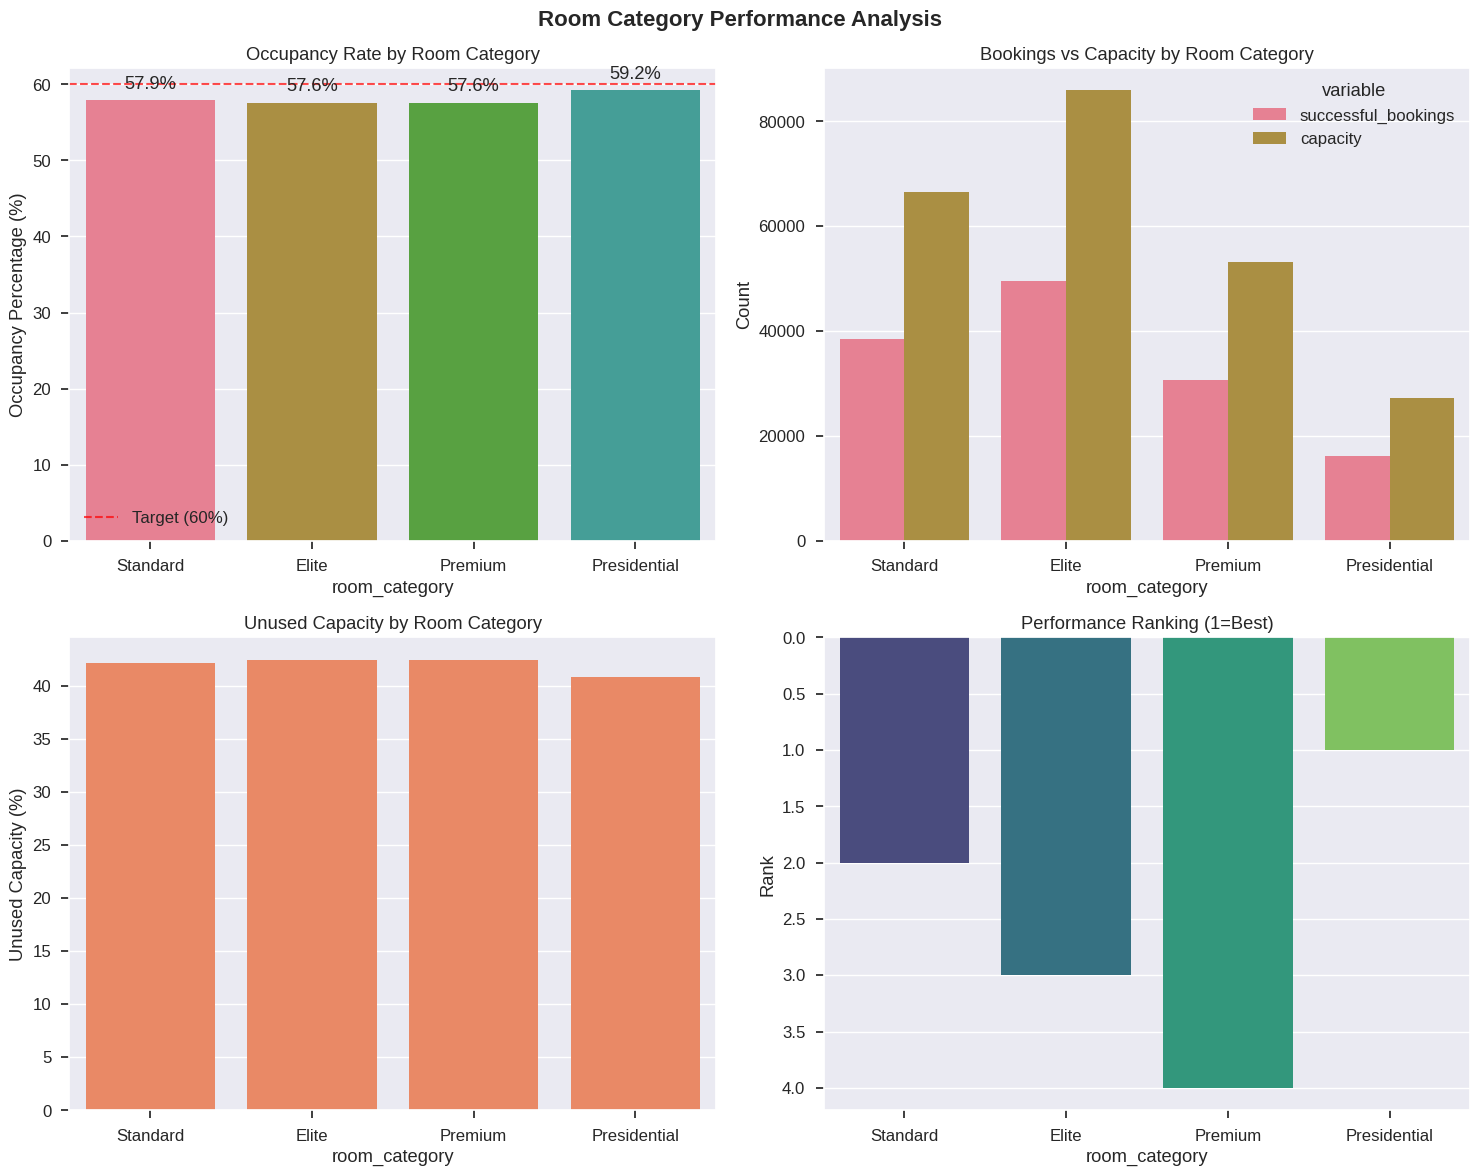


Room Performance Summary:
               successful_bookings  capacity  occupancy_rate  \
room_category                                                  
Standard                     38446     66424            0.58   
Elite                        49505     85928            0.58   
Premium                      30566     53084            0.58   
Presidential                 16073     27140            0.59   

               occupancy_percentage  unused_capacity  unused_percentage  \
room_category                                                             
Standard                      57.88            27978              42.12   
Elite                         57.61            36423              42.39   
Premium                       57.58            22518              42.42   
Presidential                  59.22            11067              40.78   

               performance_rank  
room_category                    
Standard                    2.0  
Elite                       3.0  
P

In [37]:
# Calculate room performance metrics
print("=== ROOM PERFORMANCE ANALYSIS ===")

# Check required columns
required_cols = ['room_category', 'successful_bookings', 'capacity']
if all(col in fact_aggregated_bookings.columns for col in required_cols):
    
    # Calculate occupancy metrics
    room_performance = fact_aggregated_bookings.groupby('room_category').agg({
        'successful_bookings': 'sum',
        'capacity': 'sum'
    })
    room_performance['occupancy_rate'] = room_performance['successful_bookings'] / room_performance['capacity']
    room_performance['occupancy_percentage'] = room_performance['occupancy_rate'] * 100
    
    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Room Category Performance Analysis', fontsize=16, fontweight='bold')
    
    # 1. Occupancy Rate by Room Category
    sns.barplot(data=room_performance.reset_index(), 
                x='room_category', y='occupancy_percentage', ax=axes[0,0])
    axes[0,0].set_title('Occupancy Rate by Room Category')
    axes[0,0].set_ylabel('Occupancy Percentage (%)')
    axes[0,0].axhline(y=60, color='red', linestyle='--', alpha=0.7, label='Target (60%)')
    axes[0,0].legend()
    
    # Add value labels on bars
    for i, v in enumerate(room_performance['occupancy_percentage']):
        axes[0,0].text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')
    
    # 2. Total Bookings vs Capacity
    capacity_data = room_performance[['successful_bookings', 'capacity']].reset_index()
    capacity_melted = capacity_data.melt(id_vars='room_category', 
                                        value_vars=['successful_bookings', 'capacity'])
    sns.barplot(data=capacity_melted, x='room_category', y='value', 
                hue='variable', ax=axes[0,1])
    axes[0,1].set_title('Bookings vs Capacity by Room Category')
    axes[0,1].set_ylabel('Count')
    
    # 3. Unused Capacity Analysis
    room_performance['unused_capacity'] = room_performance['capacity'] - room_performance['successful_bookings']
    room_performance['unused_percentage'] = (room_performance['unused_capacity'] / room_performance['capacity']) * 100
    
    sns.barplot(data=room_performance.reset_index(), 
                x='room_category', y='unused_percentage', ax=axes[1,0], color='coral')
    axes[1,0].set_title('Unused Capacity by Room Category')
    axes[1,0].set_ylabel('Unused Capacity (%)')
    
    # 4. Performance Rankings
    room_performance['performance_rank'] = room_performance['occupancy_percentage'].rank(ascending=False)
    sns.barplot(data=room_performance.reset_index(), 
                x='room_category', y='performance_rank', ax=axes[1,1], palette='viridis')
    axes[1,1].set_title('Performance Ranking (1=Best)')
    axes[1,1].set_ylabel('Rank')
    axes[1,1].invert_yaxis()
    
    plt.tight_layout()
    plt.show()
    
    # Display summary table
    print("\nRoom Performance Summary:")
    print(room_performance.round(2))
    
    # Identify problem areas
    low_performers = room_performance[room_performance['occupancy_percentage'] < 60]
    if not low_performers.empty:
        print(f"\n🚨 UNDERPERFORMING ROOM CATEGORIES (Below 60% occupancy):")
        for room_type in low_performers.index:
            occupancy = low_performers.loc[room_type, 'occupancy_percentage']
            unused = low_performers.loc[room_type, 'unused_percentage']
            print(f"   • {room_type}: {occupancy:.1f}% occupancy, {unused:.1f}% unused capacity")
    else:
        print("\n✅ All room categories meet occupancy targets (>60%)")

else:
    print("❌ Required columns not found for room performance analysis")



=== PROPERTY-LEVEL PERFORMANCE ANALYSIS ===


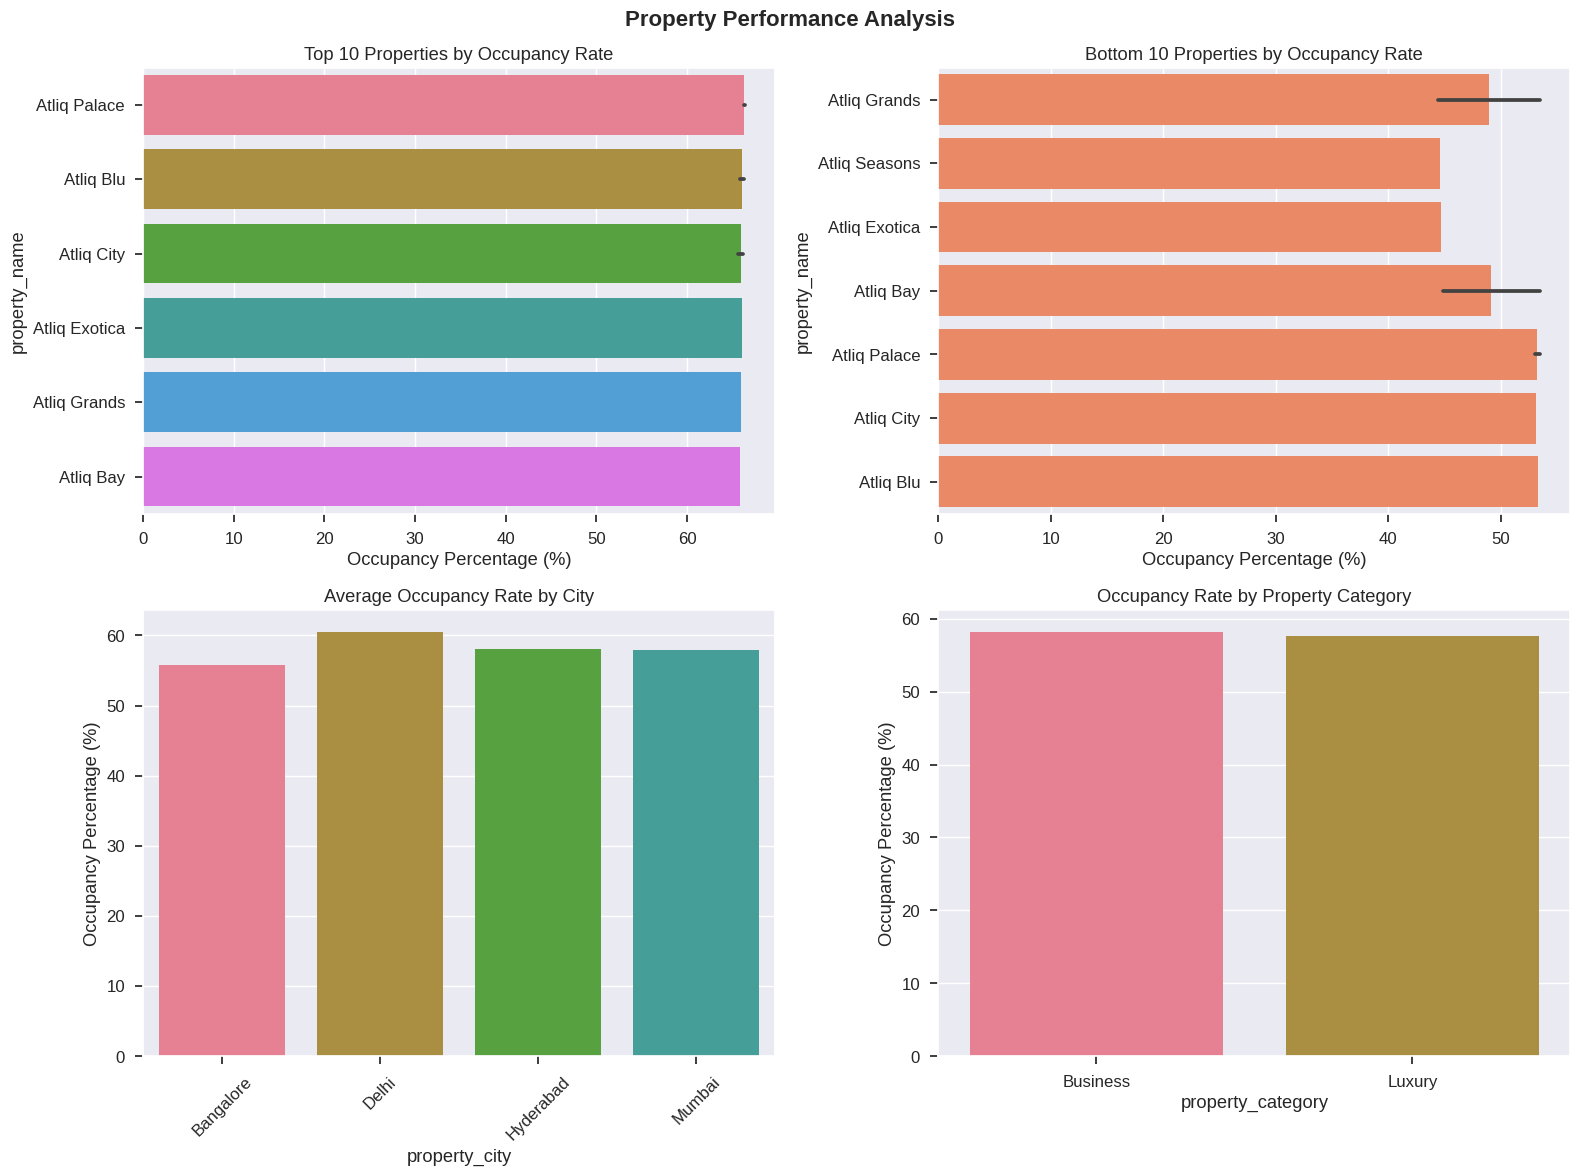

Property Performance Summary:
Total Properties Analyzed: 28
Average Occupancy Rate: 57.7%
Best Performing Property: Atliq Palace (66.4%)
Worst Performing Property: Atliq Grands (44.4%)


In [38]:
# Property performance with occupancy data
print("\n=== PROPERTY-LEVEL PERFORMANCE ANALYSIS ===")

if all(col in fact_aggregated_bookings.columns for col in ['property_name', 'property_city']):
    
    # Calculate property metrics
    property_occupancy = fact_aggregated_bookings.groupby(['property_name', 'property_city']).agg({
        'successful_bookings': 'sum',
        'capacity': 'sum'
    })
    property_occupancy['occupancy_rate'] = property_occupancy['successful_bookings'] / property_occupancy['capacity']
    property_occupancy['occupancy_percentage'] = property_occupancy['occupancy_rate'] * 100
    
    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Property Performance Analysis', fontsize=16, fontweight='bold')
    
    # 1. Occupancy by Property (Top 10)
    top_properties = property_occupancy.nlargest(10, 'occupancy_percentage').reset_index()
    sns.barplot(data=top_properties, y='property_name', x='occupancy_percentage', ax=axes[0,0])
    axes[0,0].set_title('Top 10 Properties by Occupancy Rate')
    axes[0,0].set_xlabel('Occupancy Percentage (%)')
    
    # 2. Bottom 10 Properties by Occupancy
    bottom_properties = property_occupancy.nsmallest(10, 'occupancy_percentage').reset_index()
    sns.barplot(data=bottom_properties, y='property_name', x='occupancy_percentage', 
                ax=axes[0,1], color='coral')
    axes[0,1].set_title('Bottom 10 Properties by Occupancy Rate')
    axes[0,1].set_xlabel('Occupancy Percentage (%)')
    
    # 3. City-wise Performance
    city_performance = fact_aggregated_bookings.groupby('property_city').agg({
        'successful_bookings': 'sum',
        'capacity': 'sum'
    })
    city_performance['occupancy_percentage'] = (city_performance['successful_bookings'] / city_performance['capacity']) * 100
    
    sns.barplot(data=city_performance.reset_index(), 
                x='property_city', y='occupancy_percentage', ax=axes[1,0])
    axes[1,0].set_title('Average Occupancy Rate by City')
    axes[1,0].set_ylabel('Occupancy Percentage (%)')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # 4. Property Category Performance
    if 'property_category' in fact_aggregated_bookings.columns:
        category_performance = fact_aggregated_bookings.groupby('property_category').agg({
            'successful_bookings': 'sum',
            'capacity': 'sum'
        })
        category_performance['occupancy_percentage'] = (category_performance['successful_bookings'] / category_performance['capacity']) * 100
        
        sns.barplot(data=category_performance.reset_index(), 
                    x='property_category', y='occupancy_percentage', ax=axes[1,1])
        axes[1,1].set_title('Occupancy Rate by Property Category')
        axes[1,1].set_ylabel('Occupancy Percentage (%)')
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics
    print("Property Performance Summary:")
    print(f"Total Properties Analyzed: {len(property_occupancy)}")
    print(f"Average Occupancy Rate: {property_occupancy['occupancy_percentage'].mean():.1f}%")
    print(f"Best Performing Property: {property_occupancy['occupancy_percentage'].idxmax()[0]} ({property_occupancy['occupancy_percentage'].max():.1f}%)")
    print(f"Worst Performing Property: {property_occupancy['occupancy_percentage'].idxmin()[0]} ({property_occupancy['occupancy_percentage'].min():.1f}%)")

else:
    print("❌ Property information not available")


2. Simple Revenue Analysis


=== REVENUE ANALYSIS ===


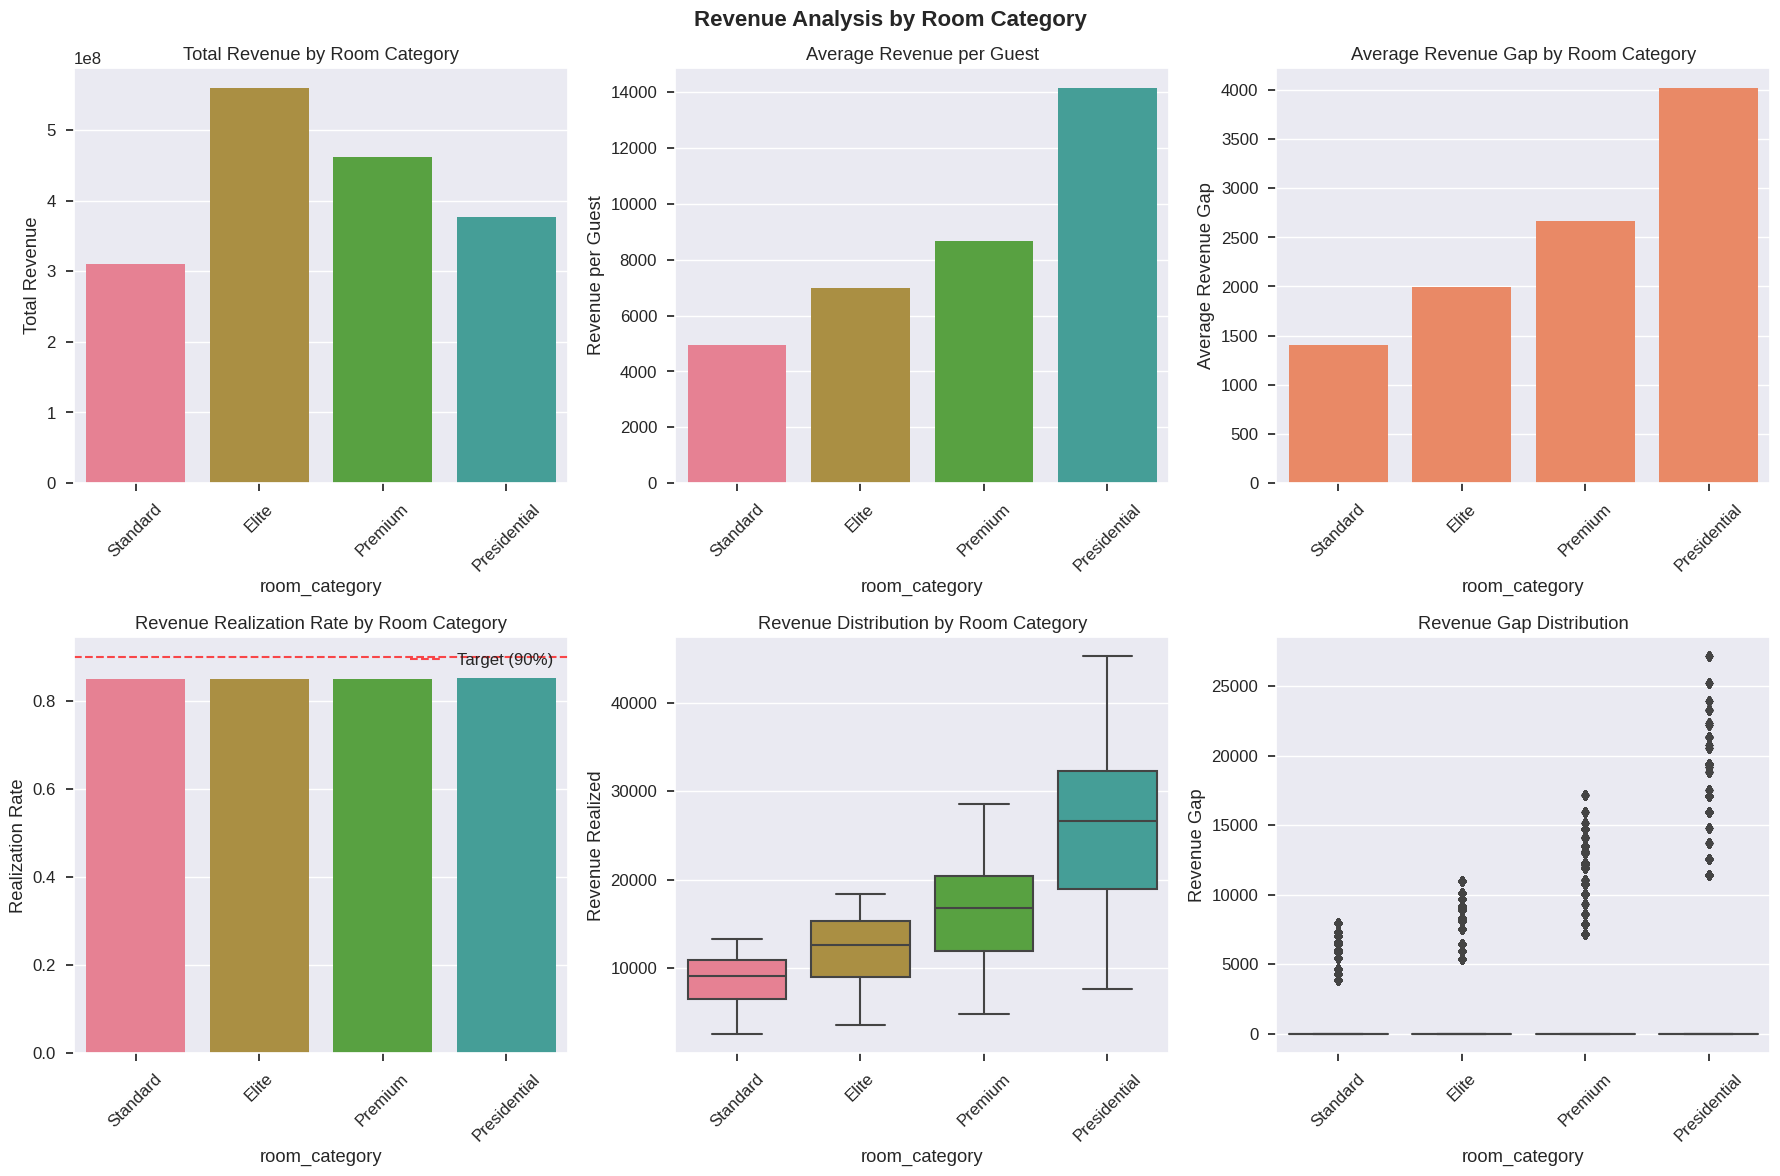

Revenue Gap Analysis:
                    sum     mean
room_category                   
Standard       53964300  1403.64
Elite          98674956  1993.23
Premium        81431496  2664.12
Presidential   64704234  4025.65

🚨 HIGH REVENUE LEAKAGE CATEGORIES (Above average gap of 2219.89):
   • Premium: Avg gap 2664.12, Total gap 81431496.00
   • Presidential: Avg gap 4025.65, Total gap 64704234.00


In [39]:
print("\n=== REVENUE ANALYSIS ===")

if all(col in fact_bookings.columns for col in ['room_category', 'revenue_realized']):
    
    # Revenue analysis
    revenue_analysis = fact_bookings.groupby('room_category').agg({
        'revenue_realized': ['sum', 'mean', 'count'],
        'revenue_generated': ['sum', 'mean'] if 'revenue_generated' in fact_bookings.columns else ['sum', 'mean'],
        'revenue_per_guest': 'mean' if 'revenue_per_guest' in fact_bookings.columns else 'mean'
    }).round(2)
    
    # Calculate revenue gap if available
    if 'revenue_gap' in fact_bookings.columns:
        gap_analysis = fact_bookings.groupby('room_category')['revenue_gap'].agg(['sum', 'mean']).round(2)
        
        # Create visualizations
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('Revenue Analysis by Room Category', fontsize=16, fontweight='bold')
        
        # 1. Total Revenue by Room Category
        total_revenue = fact_bookings.groupby('room_category')['revenue_realized'].sum()
        sns.barplot(data=total_revenue.reset_index(), 
                    x='room_category', y='revenue_realized', ax=axes[0,0])
        axes[0,0].set_title('Total Revenue by Room Category')
        axes[0,0].set_ylabel('Total Revenue')
        axes[0,0].tick_params(axis='x', rotation=45)
        
        # 2. Average Revenue per Guest
        if 'revenue_per_guest' in fact_bookings.columns:
            avg_revenue = fact_bookings.groupby('room_category')['revenue_per_guest'].mean()
            sns.barplot(data=avg_revenue.reset_index(), 
                        x='room_category', y='revenue_per_guest', ax=axes[0,1])
            axes[0,1].set_title('Average Revenue per Guest')
            axes[0,1].set_ylabel('Revenue per Guest')
            axes[0,1].tick_params(axis='x', rotation=45)
        
        # 3. Revenue Gap Analysis
        sns.barplot(data=gap_analysis.reset_index(), 
                    x='room_category', y='mean', ax=axes[0,2], color='coral')
        axes[0,2].set_title('Average Revenue Gap by Room Category')
        axes[0,2].set_ylabel('Average Revenue Gap')
        axes[0,2].tick_params(axis='x', rotation=45)
        
        # 4. Revenue Realization Rate
        if 'revenue_realization_rate' in fact_bookings.columns:
            realization_rate = fact_bookings.groupby('room_category')['revenue_realization_rate'].mean()
            sns.barplot(data=realization_rate.reset_index(), 
                        x='room_category', y='revenue_realization_rate', ax=axes[1,0])
            axes[1,0].set_title('Revenue Realization Rate by Room Category')
            axes[1,0].set_ylabel('Realization Rate')
            axes[1,0].tick_params(axis='x', rotation=45)
            axes[1,0].axhline(y=0.9, color='red', linestyle='--', alpha=0.7, label='Target (90%)')
            axes[1,0].legend()
        
        # 5. Revenue Distribution
        sns.boxplot(data=fact_bookings, x='room_category', y='revenue_realized', ax=axes[1,1])
        axes[1,1].set_title('Revenue Distribution by Room Category')
        axes[1,1].set_ylabel('Revenue Realized')
        axes[1,1].tick_params(axis='x', rotation=45)
        
        # 6. Revenue Gap Distribution
        sns.boxplot(data=fact_bookings, x='room_category', y='revenue_gap', ax=axes[1,2])
        axes[1,2].set_title('Revenue Gap Distribution')
        axes[1,2].set_ylabel('Revenue Gap')
        axes[1,2].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        # Summary analysis
        print("Revenue Gap Analysis:")
        print(gap_analysis)
        
        # Identify high revenue gap categories
        avg_gap = fact_bookings['revenue_gap'].mean()
        high_gap_categories = gap_analysis[gap_analysis['mean'] > avg_gap]
        
        if not high_gap_categories.empty:
            print(f"\n🚨 HIGH REVENUE LEAKAGE CATEGORIES (Above average gap of {avg_gap:.2f}):")
            for category in high_gap_categories.index:
                gap_amount = high_gap_categories.loc[category, 'mean']
                total_gap = high_gap_categories.loc[category, 'sum']
                print(f"   • {category}: Avg gap {gap_amount:.2f}, Total gap {total_gap:.2f}")
    
    else:
        print("Revenue gap column not available - calculating basic revenue metrics")
        
        # Basic revenue visualization
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        
        # Total revenue by category
        total_revenue = fact_bookings.groupby('room_category')['revenue_realized'].sum()
        sns.barplot(data=total_revenue.reset_index(), 
                    x='room_category', y='revenue_realized', ax=axes[0])
        axes[0].set_title('Total Revenue by Room Category')
        axes[0].tick_params(axis='x', rotation=45)
        
        # Average revenue by category
        avg_revenue = fact_bookings.groupby('room_category')['revenue_realized'].mean()
        sns.barplot(data=avg_revenue.reset_index(), 
                    x='room_category', y='revenue_realized', ax=axes[1])
        axes[1].set_title('Average Revenue by Room Category')
        axes[1].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()

else:
    print("❌ Revenue columns not available")


3. Simple Cancellation Analysis


=== CANCELLATION ANALYSIS ===


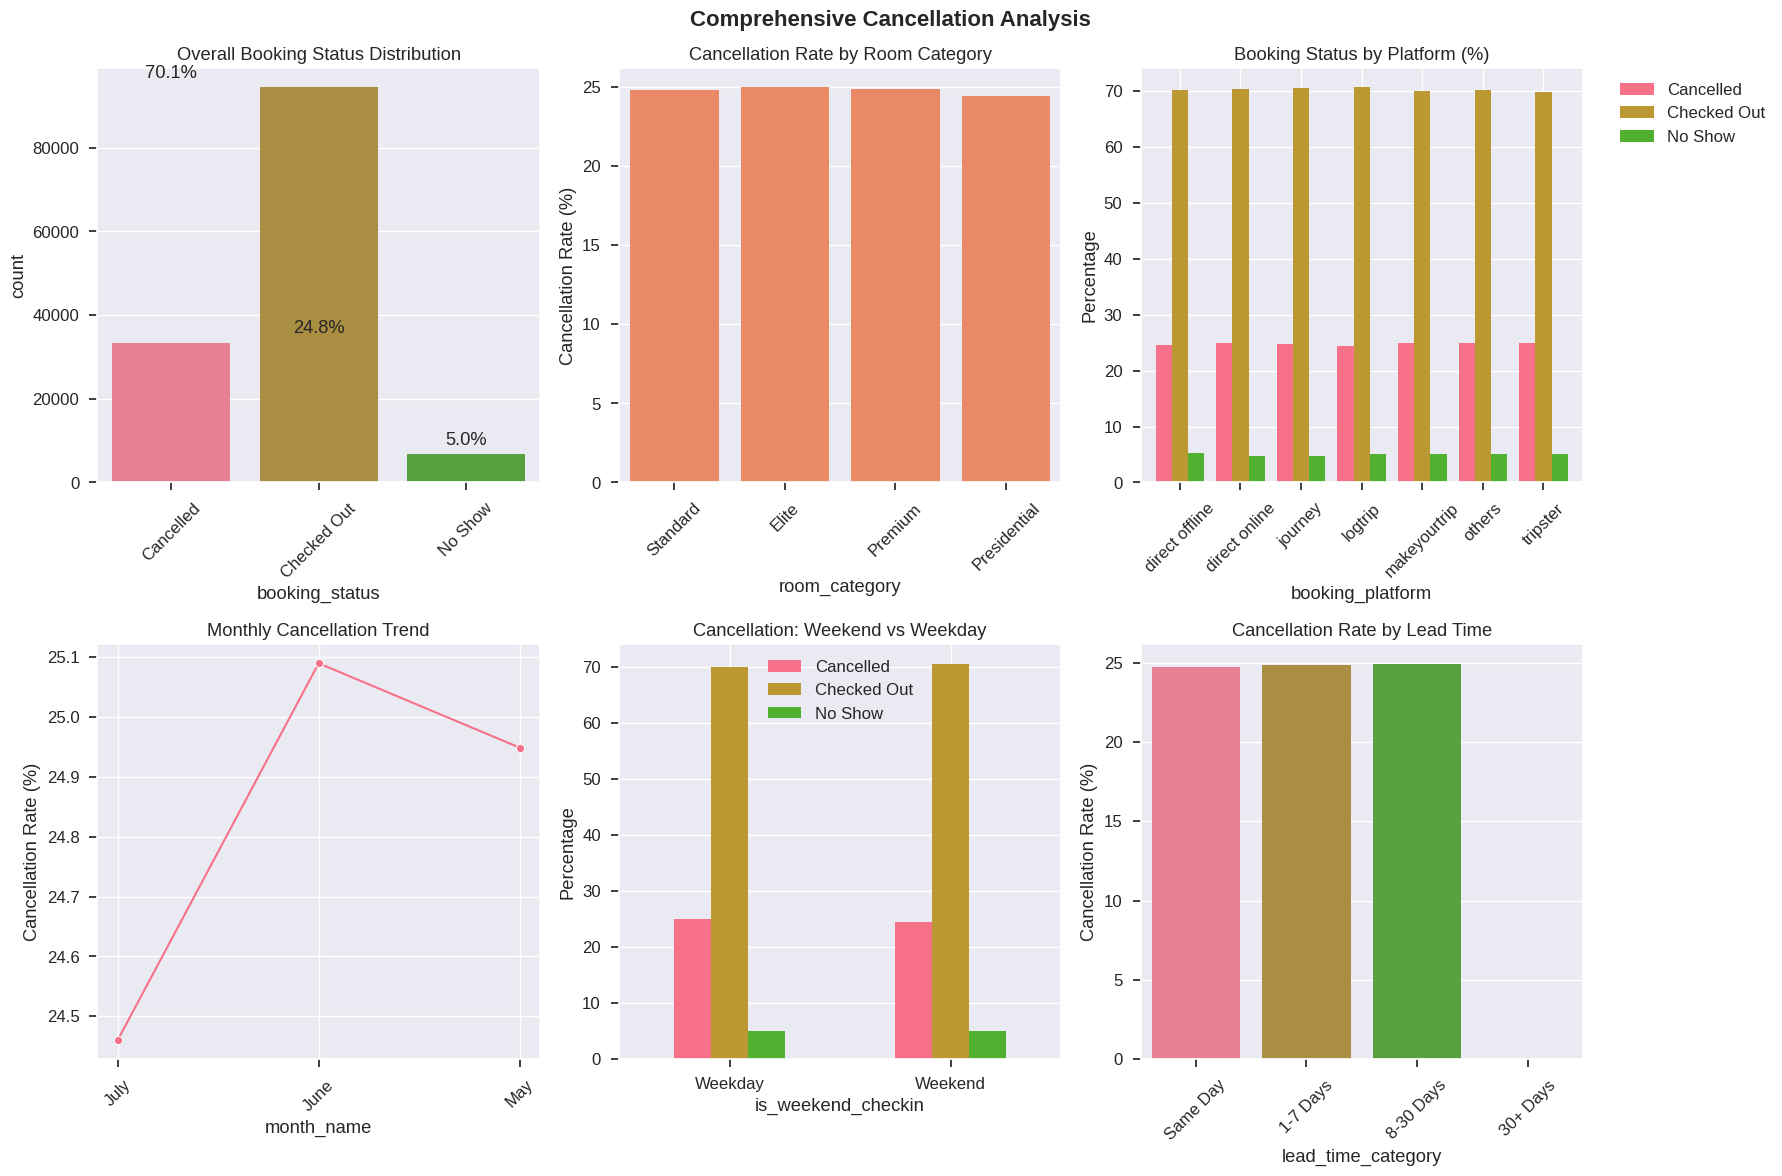

Cancellation Summary:
   • Checked Out: 94,411 bookings (70.1%)
   • Cancelled: 33,420 bookings (24.8%)
   • No Show: 6,759 bookings (5.0%)

🚨 HIGH CANCELLATION ROOM CATEGORIES (Above average 24.8%):
   • Standard: 24.8% cancellation rate
   • Elite: 25.0% cancellation rate
   • Premium: 24.9% cancellation rate


In [40]:
print("\n=== CANCELLATION ANALYSIS ===")

if 'booking_status' in fact_bookings.columns:
    
    # Overall booking status distribution
    status_counts = fact_bookings['booking_status'].value_counts()
    status_percentages = fact_bookings['booking_status'].value_counts(normalize=True) * 100
    
    # Create comprehensive visualizations
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Comprehensive Cancellation Analysis', fontsize=16, fontweight='bold')
    
    # 1. Overall Booking Status Distribution
    sns.countplot(data=fact_bookings, x='booking_status', ax=axes[0,0])
    axes[0,0].set_title('Overall Booking Status Distribution')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # Add percentage labels
    total = len(fact_bookings)
    for i, (status, count) in enumerate(status_counts.items()):
        percentage = (count / total) * 100
        axes[0,0].text(i, count + total*0.01, f'{percentage:.1f}%', 
                      ha='center', va='bottom')
    
    # 2. Cancellation Rate by Room Category
    cancel_by_room = pd.crosstab(fact_bookings['room_category'], 
                                fact_bookings['booking_status'], normalize='index') * 100
    
    if 'Cancelled' in cancel_by_room.columns:
        sns.barplot(data=cancel_by_room.reset_index(), 
                    x='room_category', y='Cancelled', ax=axes[0,1], color='coral')
        axes[0,1].set_title('Cancellation Rate by Room Category')
        axes[0,1].set_ylabel('Cancellation Rate (%)')
        axes[0,1].tick_params(axis='x', rotation=45)
    
    # 3. Booking Status by Platform
    if 'booking_platform' in fact_bookings.columns:
        platform_status = pd.crosstab(fact_bookings['booking_platform'], 
                                     fact_bookings['booking_status'], normalize='index') * 100
        
        platform_status.plot(kind='bar', ax=axes[0,2], width=0.8)
        axes[0,2].set_title('Booking Status by Platform (%)')
        axes[0,2].set_ylabel('Percentage')
        axes[0,2].tick_params(axis='x', rotation=45)
        axes[0,2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # 4. Seasonal Cancellation Patterns
    if 'month_name' in fact_bookings.columns:
        monthly_cancellation = pd.crosstab(fact_bookings['month_name'], 
                                          fact_bookings['booking_status'], normalize='index') * 100
        
        if 'Cancelled' in monthly_cancellation.columns:
            sns.lineplot(data=monthly_cancellation.reset_index(), 
                        x='month_name', y='Cancelled', ax=axes[1,0], marker='o')
            axes[1,0].set_title('Monthly Cancellation Trend')
            axes[1,0].set_ylabel('Cancellation Rate (%)')
            axes[1,0].tick_params(axis='x', rotation=45)
    
    # 5. Weekend vs Weekday Cancellations
    if 'is_weekend_checkin' in fact_bookings.columns:
        weekend_cancellation = pd.crosstab(fact_bookings['is_weekend_checkin'], 
                                          fact_bookings['booking_status'], normalize='index') * 100
        
        weekend_cancellation.plot(kind='bar', ax=axes[1,1])
        axes[1,1].set_title('Cancellation: Weekend vs Weekday')
        axes[1,1].set_ylabel('Percentage')
        axes[1,1].set_xticklabels(['Weekday', 'Weekend'], rotation=0)
        axes[1,1].legend()
    
    # 6. Cancellation by Lead Time
    if 'booking_lead_time' in fact_bookings.columns:
        # Create lead time categories
        fact_bookings['lead_time_category'] = pd.cut(fact_bookings['booking_lead_time'], 
                                                    bins=[-1, 0, 7, 30, float('inf')], 
                                                    labels=['Same Day', '1-7 Days', '8-30 Days', '30+ Days'])
        
        leadtime_cancellation = pd.crosstab(fact_bookings['lead_time_category'], 
                                           fact_bookings['booking_status'], normalize='index') * 100
        
        if 'Cancelled' in leadtime_cancellation.columns:
            sns.barplot(data=leadtime_cancellation.reset_index(), 
                       x='lead_time_category', y='Cancelled', ax=axes[1,2])
            axes[1,2].set_title('Cancellation Rate by Lead Time')
            axes[1,2].set_ylabel('Cancellation Rate (%)')
            axes[1,2].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics
    print("Cancellation Summary:")
    for status, count in status_counts.items():
        percentage = status_percentages[status]
        print(f"   • {status}: {count:,} bookings ({percentage:.1f}%)")
    
    # Identify high cancellation areas
    if 'Cancelled' in cancel_by_room.columns:
        avg_cancellation = cancel_by_room['Cancelled'].mean()
        high_cancel_rooms = cancel_by_room[cancel_by_room['Cancelled'] > avg_cancellation]['Cancelled']
        
        if not high_cancel_rooms.empty:
            print(f"\n🚨 HIGH CANCELLATION ROOM CATEGORIES (Above average {avg_cancellation:.1f}%):")
            for room_type, rate in high_cancel_rooms.items():
                print(f"   • {room_type}: {rate:.1f}% cancellation rate")

else:
    print("❌ Booking status column not available")


4. Pricing and Customer Satisfaction Analysis


=== PRICING AND CUSTOMER SATISFACTION ANALYSIS ===


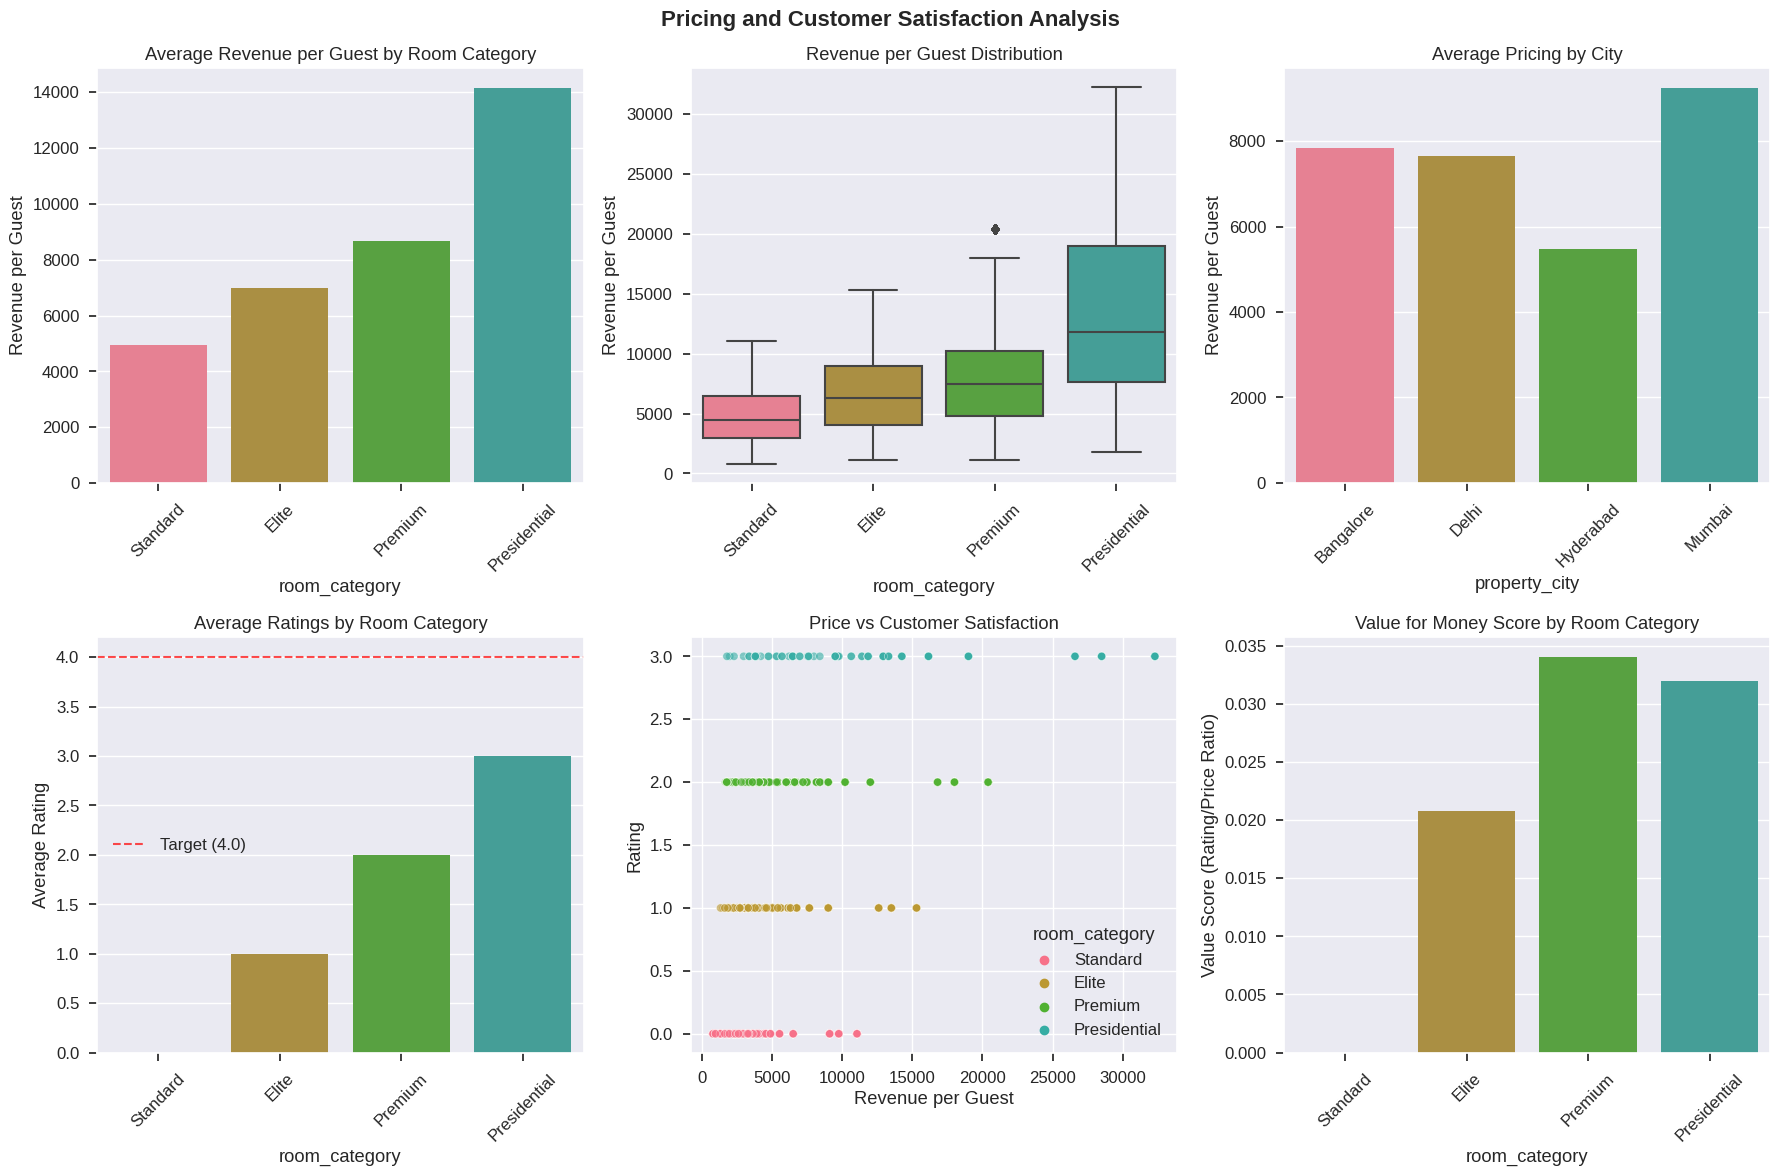

Pricing Analysis Summary:
                   mean      std      min      max
room_category                                     
Standard        4934.71  2860.58   780.00  11050.0
Elite           6995.17  4061.44  1080.00  15300.0
Premium         8680.08  5186.19  1120.00  20400.0
Presidential   14171.50  8637.26  1773.33  32300.0

Rating Analysis Summary:
               mean  count
room_category             
Standard        0.0  38446
Elite           1.0  49505
Premium         2.0  30566
Presidential    3.0  16073

🚨 LOW SATISFACTION CATEGORIES (Below 3.5 rating):
   • Standard: 0.00 rating (38446 reviews)
   • Elite: 1.00 rating (49505 reviews)
   • Premium: 2.00 rating (30566 reviews)
   • Presidential: 3.00 rating (16073 reviews)


In [41]:
print("\n=== PRICING AND CUSTOMER SATISFACTION ANALYSIS ===")

if 'revenue_per_guest' in fact_bookings.columns:
    
    # Create comprehensive pricing visualizations
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Pricing and Customer Satisfaction Analysis', fontsize=16, fontweight='bold')
    
    # 1. Average Revenue per Guest by Room Category
    avg_pricing = fact_bookings.groupby('room_category')['revenue_per_guest'].mean()
    sns.barplot(data=avg_pricing.reset_index(), 
                x='room_category', y='revenue_per_guest', ax=axes[0,0])
    axes[0,0].set_title('Average Revenue per Guest by Room Category')
    axes[0,0].set_ylabel('Revenue per Guest')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # 2. Pricing Distribution
    sns.boxplot(data=fact_bookings, x='room_category', y='revenue_per_guest', ax=axes[0,1])
    axes[0,1].set_title('Revenue per Guest Distribution')
    axes[0,1].set_ylabel('Revenue per Guest')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # 3. City-wise Pricing Comparison
    if 'property_city' in fact_bookings.columns:
        city_pricing = fact_bookings.groupby('property_city')['revenue_per_guest'].mean()
        sns.barplot(data=city_pricing.reset_index(), 
                    x='property_city', y='revenue_per_guest', ax=axes[0,2])
        axes[0,2].set_title('Average Pricing by City')
        axes[0,2].set_ylabel('Revenue per Guest')
        axes[0,2].tick_params(axis='x', rotation=45)
    
    # 4. Customer Ratings Analysis
    if 'ratings_given' in fact_bookings.columns:
        # Rating by room category
        avg_ratings = fact_bookings.groupby('room_category')['ratings_given'].mean()
        sns.barplot(data=avg_ratings.reset_index(), 
                    x='room_category', y='ratings_given', ax=axes[1,0])
        axes[1,0].set_title('Average Ratings by Room Category')
        axes[1,0].set_ylabel('Average Rating')
        axes[1,0].tick_params(axis='x', rotation=45)
        axes[1,0].axhline(y=4.0, color='red', linestyle='--', alpha=0.7, label='Target (4.0)')
        axes[1,0].legend()
        
        # 5. Price vs Satisfaction Scatter
        # Sample data for better visualization
        sample_data = fact_bookings.sample(n=min(1000, len(fact_bookings)), random_state=42)
        sns.scatterplot(data=sample_data, x='revenue_per_guest', y='ratings_given', 
                       hue='room_category', ax=axes[1,1], alpha=0.6)
        axes[1,1].set_title('Price vs Customer Satisfaction')
        axes[1,1].set_xlabel('Revenue per Guest')
        axes[1,1].set_ylabel('Rating')
        
        # 6. Value for Money Analysis
        if 'ratings_given' in fact_bookings.columns and 'revenue_per_guest' in fact_bookings.columns:
            # Calculate value score (rating per unit price)
            fact_bookings['value_score'] = fact_bookings['ratings_given'] / (fact_bookings['revenue_per_guest'] / 100)
            
            value_analysis = fact_bookings.groupby('room_category')['value_score'].mean()
            sns.barplot(data=value_analysis.reset_index(), 
                       x='room_category', y='value_score', ax=axes[1,2])
            axes[1,2].set_title('Value for Money Score by Room Category')
            axes[1,2].set_ylabel('Value Score (Rating/Price Ratio)')
            axes[1,2].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Pricing summary
    print("Pricing Analysis Summary:")
    pricing_summary = fact_bookings.groupby('room_category')['revenue_per_guest'].agg(['mean', 'std', 'min', 'max']).round(2)
    print(pricing_summary)
    
    # Identify pricing issues
    if 'ratings_given' in fact_bookings.columns:
        rating_summary = fact_bookings.groupby('room_category')['ratings_given'].agg(['mean', 'count']).round(2)
        print(f"\nRating Analysis Summary:")
        print(rating_summary)
        
        # Low satisfaction categories
        low_rated = rating_summary[rating_summary['mean'] < 3.5]
        if not low_rated.empty:
            print(f"\n🚨 LOW SATISFACTION CATEGORIES (Below 3.5 rating):")
            for category in low_rated.index:
                rating = low_rated.loc[category, 'mean']
                count = low_rated.loc[category, 'count']
                print(f"   • {category}: {rating:.2f} rating ({count} reviews)")

else:
    print("❌ Pricing columns not available")


5. Platform and Booking Behavior Analysis


=== PLATFORM AND BOOKING BEHAVIOR ANALYSIS ===
✅ Platform analysis starting...
✅ Platform booking counts plotted successfully
✅ Platform revenue analysis plotted successfully
✅ Market share chart created successfully
✅ Platform ratings plotted successfully
✅ Performance matrix created successfully
✅ Summary panel created successfully


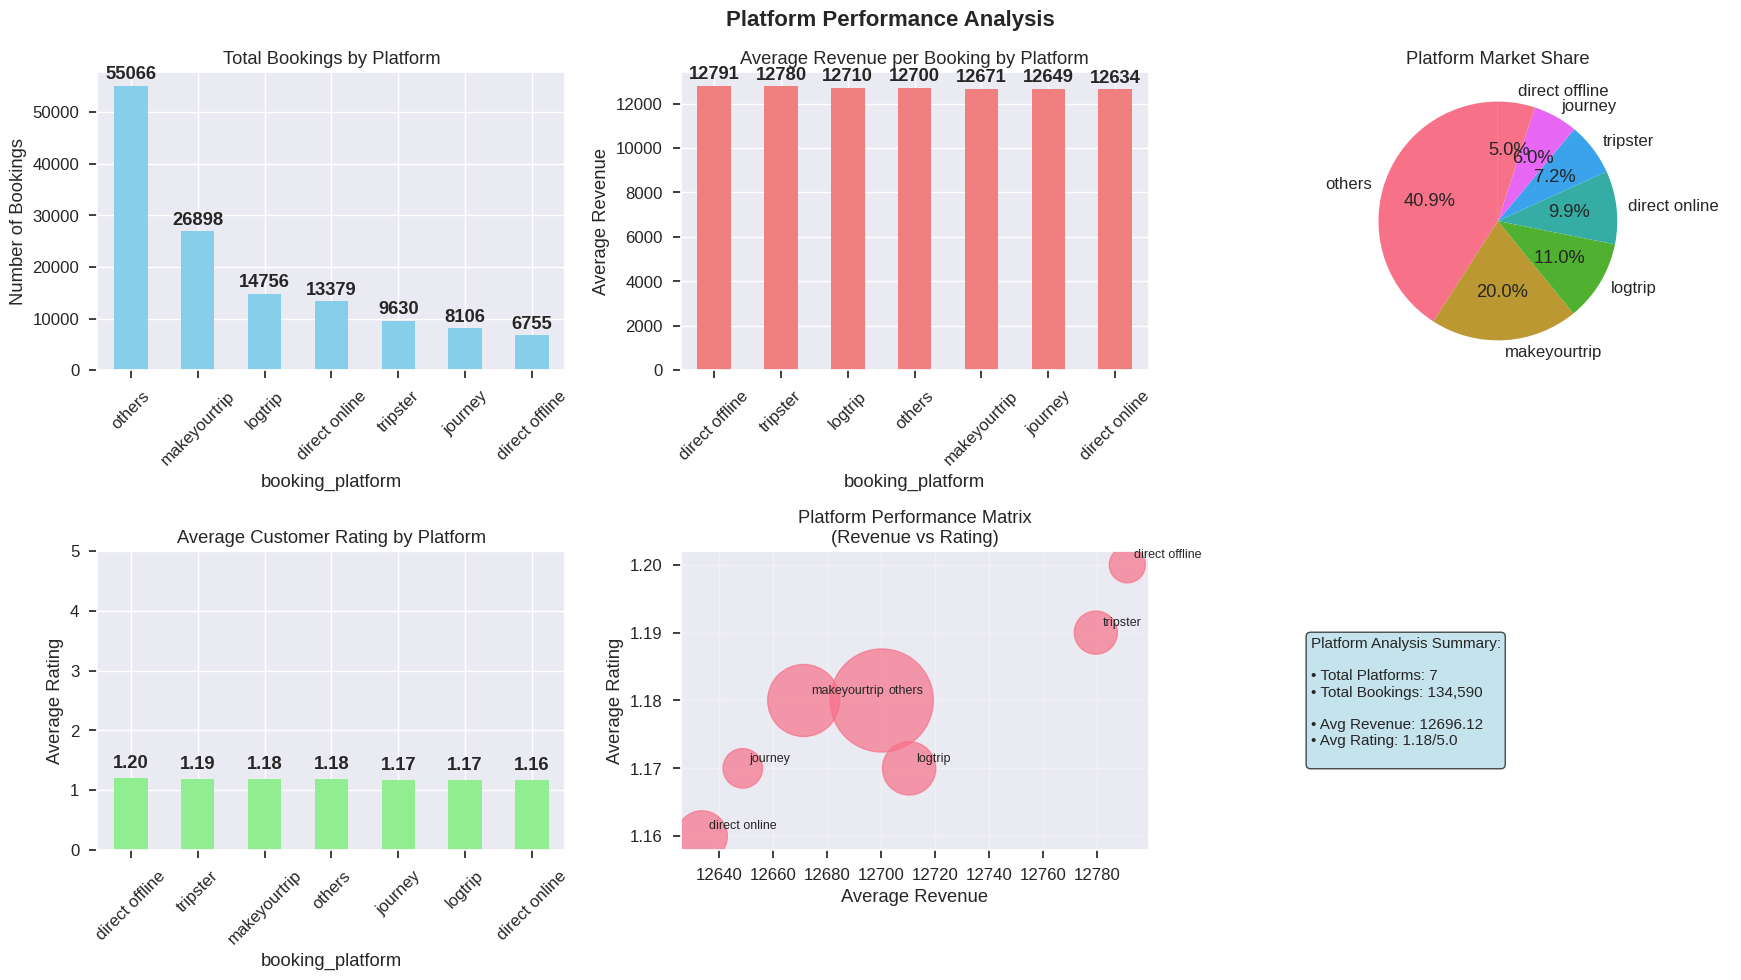


PLATFORM PERFORMANCE SUMMARY

Total Bookings Analyzed: 134,590
Number of Platforms: 7

Platform Rankings by Volume:
------------------------------
1. others: 55,066 bookings (40.9%)
2. makeyourtrip: 26,898 bookings (20.0%)
3. logtrip: 14,756 bookings (11.0%)
4. direct online: 13,379 bookings (9.9%)
5. tripster: 9,630 bookings (7.2%)

Revenue Analysis:
--------------------
• others:
  - Bookings: 55,066
  - Avg Revenue: 12700.27
  - Total Revenue: 699,353,302
• makeyourtrip:
  - Bookings: 26,898
  - Avg Revenue: 12671.37
  - Total Revenue: 340,834,504
• logtrip:
  - Bookings: 14,756
  - Avg Revenue: 12710.39
  - Total Revenue: 187,554,488
• direct online:
  - Bookings: 13,379
  - Avg Revenue: 12633.71
  - Total Revenue: 169,026,467
• tripster:
  - Bookings: 9,630
  - Avg Revenue: 12779.52
  - Total Revenue: 123,066,801

Customer Satisfaction:
-------------------------
• direct offline: 1.20/5.0 (6,755 ratings)
• tripster: 1.19/5.0 (9,630 ratings)
• makeyourtrip: 1.18/5.0 (26,898 rating

In [42]:
print("\n=== PLATFORM AND BOOKING BEHAVIOR ANALYSIS ===")

# Check if booking_platform column exists
if 'booking_platform' not in fact_bookings.columns:
    print("❌ Booking platform information not available in the dataset")
else:
    print("✅ Platform analysis starting...")
    
    # Create simple visualizations - FIXED: 2x3 grid to accommodate all plots
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Platform Performance Analysis', fontsize=16, fontweight='bold')
    
    # 1. Simple Platform Booking Counts
    try:
        platform_counts = fact_bookings['booking_platform'].value_counts()
        
        # Plot 1: Booking counts - axes[0,0]
        platform_counts.plot(kind='bar', ax=axes[0,0], color='skyblue')
        axes[0,0].set_title('Total Bookings by Platform')
        axes[0,0].set_ylabel('Number of Bookings')
        axes[0,0].tick_params(axis='x', rotation=45)
        
        # Add count labels on bars
        for i, v in enumerate(platform_counts.values):
            axes[0,0].text(i, v + max(platform_counts.values)*0.01, str(v), 
                          ha='center', va='bottom', fontweight='bold')
        
        print(f"✅ Platform booking counts plotted successfully")
        
    except Exception as e:
        print(f"❌ Error plotting booking counts: {e}")
        axes[0,0].text(0.5, 0.5, 'Error plotting\nbooking counts', ha='center', va='center')
    
    # 2. Average Revenue by Platform - axes[0,1]
    try:
        if 'revenue_realized' in fact_bookings.columns:
            platform_revenue = fact_bookings.groupby('booking_platform')['revenue_realized'].mean().sort_values(ascending=False)
            
            platform_revenue.plot(kind='bar', ax=axes[0,1], color='lightcoral')
            axes[0,1].set_title('Average Revenue per Booking by Platform')
            axes[0,1].set_ylabel('Average Revenue')
            axes[0,1].tick_params(axis='x', rotation=45)
            
            # Add value labels
            for i, v in enumerate(platform_revenue.values):
                axes[0,1].text(i, v + max(platform_revenue.values)*0.01, f'{v:.0f}', 
                              ha='center', va='bottom', fontweight='bold')
            
            print(f"✅ Platform revenue analysis plotted successfully")
        else:
            axes[0,1].text(0.5, 0.5, 'Revenue data\nnot available', ha='center', va='center')
            
    except Exception as e:
        print(f"❌ Error plotting revenue analysis: {e}")
        axes[0,1].text(0.5, 0.5, 'Error plotting\nrevenue data', ha='center', va='center')
    
    # 3. Market Share Pie Chart - axes[0,2]
    try:
        platform_percentages = fact_bookings['booking_platform'].value_counts(normalize=True) * 100
        
        axes[0,2].pie(platform_percentages.values, labels=platform_percentages.index, 
                      autopct='%1.1f%%', startangle=90)
        axes[0,2].set_title('Platform Market Share')
        
        print(f"✅ Market share chart created successfully")
        
    except Exception as e:
        print(f"❌ Error creating pie chart: {e}")
        axes[0,2].text(0.5, 0.5, 'Error creating\npie chart', ha='center', va='center')
    
    # 4. Customer Ratings by Platform - axes[1,0]
    try:
        if 'ratings_given' in fact_bookings.columns:
            platform_ratings = fact_bookings.groupby('booking_platform')['ratings_given'].mean().sort_values(ascending=False)
            
            platform_ratings.plot(kind='bar', ax=axes[1,0], color='lightgreen')
            axes[1,0].set_title('Average Customer Rating by Platform')
            axes[1,0].set_ylabel('Average Rating')
            axes[1,0].tick_params(axis='x', rotation=45)
            axes[1,0].set_ylim(0, 5)
            
            # Add rating labels
            for i, v in enumerate(platform_ratings.values):
                axes[1,0].text(i, v + 0.1, f'{v:.2f}', 
                              ha='center', va='bottom', fontweight='bold')
            
            print(f"✅ Platform ratings plotted successfully")
        else:
            axes[1,0].text(0.5, 0.5, 'Rating data\nnot available', ha='center', va='center')
            axes[1,0].set_title('Customer Ratings')
            
    except Exception as e:
        print(f"❌ Error plotting ratings: {e}")
        axes[1,0].text(0.5, 0.5, 'Error plotting\nratings', ha='center', va='center')
    
    # 5. FIXED Platform Performance Summary - axes[1,1]
    try:
        if 'revenue_realized' in fact_bookings.columns and 'ratings_given' in fact_bookings.columns:
            # Create performance summary
            platform_performance = fact_bookings.groupby('booking_platform').agg({
                'revenue_realized': 'mean',
                'ratings_given': 'mean',
                'booking_id': 'count'
            }).round(2)
            
            # FIXED: Simple scatter plot without problematic color specification
            axes[1,1].scatter(platform_performance['revenue_realized'], 
                             platform_performance['ratings_given'],
                             s=platform_performance['booking_id']/10,  # Size by booking count
                             alpha=0.7)  # Removed the problematic 'c' parameter
            
            # Add platform labels
            for i, platform in enumerate(platform_performance.index):
                axes[1,1].annotate(platform, 
                                  (platform_performance.iloc[i]['revenue_realized'], 
                                   platform_performance.iloc[i]['ratings_given']),
                                  xytext=(5, 5), textcoords='offset points', fontsize=9)
            
            axes[1,1].set_title('Platform Performance Matrix\n(Revenue vs Rating)')
            axes[1,1].set_xlabel('Average Revenue')
            axes[1,1].set_ylabel('Average Rating')
            axes[1,1].grid(True, alpha=0.3)
            
            print(f"✅ Performance matrix created successfully")
            
        else:
            axes[1,1].text(0.5, 0.5, 'Performance data\nnot available', ha='center', va='center')
            axes[1,1].set_title('Performance Matrix')
            
    except Exception as e:
        print(f"❌ Error creating performance matrix: {e}")
        axes[1,1].text(0.5, 0.5, 'Error creating\nperformance matrix', ha='center', va='center')
    
    # 6. Hide the last subplot or use for summary text - axes[1,2]
    try:
        axes[1,2].axis('off')  # Turn off the last subplot
        
        # Add summary text
        summary_text = "Platform Analysis Summary:\n\n"
        
        # Get basic stats
        total_platforms = fact_bookings['booking_platform'].nunique()
        total_bookings = len(fact_bookings)
        
        summary_text += f"• Total Platforms: {total_platforms}\n"
        summary_text += f"• Total Bookings: {total_bookings:,}\n\n"
        
        if 'revenue_realized' in fact_bookings.columns:
            avg_revenue = fact_bookings['revenue_realized'].mean()
            summary_text += f"• Avg Revenue: {avg_revenue:.2f}\n"
        
        if 'ratings_given' in fact_bookings.columns:
            avg_rating = fact_bookings['ratings_given'].mean()
            summary_text += f"• Avg Rating: {avg_rating:.2f}/5.0\n"
        
        axes[1,2].text(0.1, 0.5, summary_text, ha='left', va='center', 
                      fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))
        
        print(f"✅ Summary panel created successfully")
        
    except Exception as e:
        print(f"❌ Error creating summary: {e}")
        axes[1,2].text(0.5, 0.5, 'Summary\nError', ha='center', va='center')
    
    plt.tight_layout()
    plt.show()
    
    # Rest of the summary statistics code remains the same...
    print("\n" + "="*60)
    print("PLATFORM PERFORMANCE SUMMARY")
    print("="*60)
    
    try:
        # Basic platform statistics
        total_bookings = len(fact_bookings)
        platform_counts = fact_bookings['booking_platform'].value_counts()
        
        print(f"\nTotal Bookings Analyzed: {total_bookings:,}")
        print(f"Number of Platforms: {len(platform_counts)}")
        
        print(f"\nPlatform Rankings by Volume:")
        print("-" * 30)
        for i, (platform, count) in enumerate(platform_counts.head().items(), 1):
            percentage = (count / total_bookings) * 100
            print(f"{i}. {platform}: {count:,} bookings ({percentage:.1f}%)")
        
        # Revenue analysis (if available)
        if 'revenue_realized' in fact_bookings.columns:
            print(f"\nRevenue Analysis:")
            print("-" * 20)
            
            platform_revenue_stats = fact_bookings.groupby('booking_platform')['revenue_realized'].agg(['count', 'mean', 'sum']).round(2)
            platform_revenue_stats = platform_revenue_stats.sort_values('sum', ascending=False)
            
            for platform in platform_revenue_stats.head().index:
                count = platform_revenue_stats.loc[platform, 'count']
                avg_rev = platform_revenue_stats.loc[platform, 'mean']
                total_rev = platform_revenue_stats.loc[platform, 'sum']
                print(f"• {platform}:")
                print(f"  - Bookings: {count:,}")
                print(f"  - Avg Revenue: {avg_rev:.2f}")
                print(f"  - Total Revenue: {total_rev:,.0f}")
        
        # Rating analysis (if available)
        if 'ratings_given' in fact_bookings.columns:
            print(f"\nCustomer Satisfaction:")
            print("-" * 25)
            
            platform_rating_stats = fact_bookings.groupby('booking_platform')['ratings_given'].agg(['count', 'mean']).round(2)
            platform_rating_stats = platform_rating_stats.sort_values('mean', ascending=False)
            
            for platform in platform_rating_stats.head().index:
                count = platform_rating_stats.loc[platform, 'count']
                avg_rating = platform_rating_stats.loc[platform, 'mean']
                print(f"• {platform}: {avg_rating:.2f}/5.0 ({count:,} ratings)")
        
        # Simple insights
        print(f"\n💡 KEY INSIGHTS:")
        print("-" * 20)
        
        # Top platform by volume
        top_platform = platform_counts.index[0]
        top_platform_share = (platform_counts.iloc[0] / total_bookings) * 100
        print(f"• Market Leader: {top_platform} ({top_platform_share:.1f}% market share)")
        
        # Revenue insights
        if 'revenue_realized' in fact_bookings.columns:
            total_revenue = fact_bookings['revenue_realized'].sum()
            avg_revenue = fact_bookings['revenue_realized'].mean()
            print(f"• Total Revenue: {total_revenue:,.0f}")
            print(f"• Average Revenue per Booking: {avg_revenue:.2f}")
            
            # Best revenue platform
            best_revenue_platform = platform_revenue_stats.index[0]
            best_avg_revenue = platform_revenue_stats.loc[best_revenue_platform, 'mean']
            print(f"• Highest Revenue Platform: {best_revenue_platform} (Avg: {best_avg_revenue:.2f})")
        
        # Rating insights
        if 'ratings_given' in fact_bookings.columns:
            overall_rating = fact_bookings['ratings_given'].mean()
            print(f"• Overall Average Rating: {overall_rating:.2f}/5.0")
            
            best_rated_platform = platform_rating_stats.index[0]
            best_rating = platform_rating_stats.loc[best_rated_platform, 'mean']
            print(f"• Best Rated Platform: {best_rated_platform} ({best_rating:.2f}/5.0)")
        
    except Exception as e:
        print(f"❌ Error generating summary statistics: {e}")
        print("Please check your data structure and try again.")
    
    print("\n" + "="*60)
    print("ANALYSIS COMPLETE")
    print("="*60)


6. Time-Based Analysis


=== TEMPORAL ANALYSIS ===


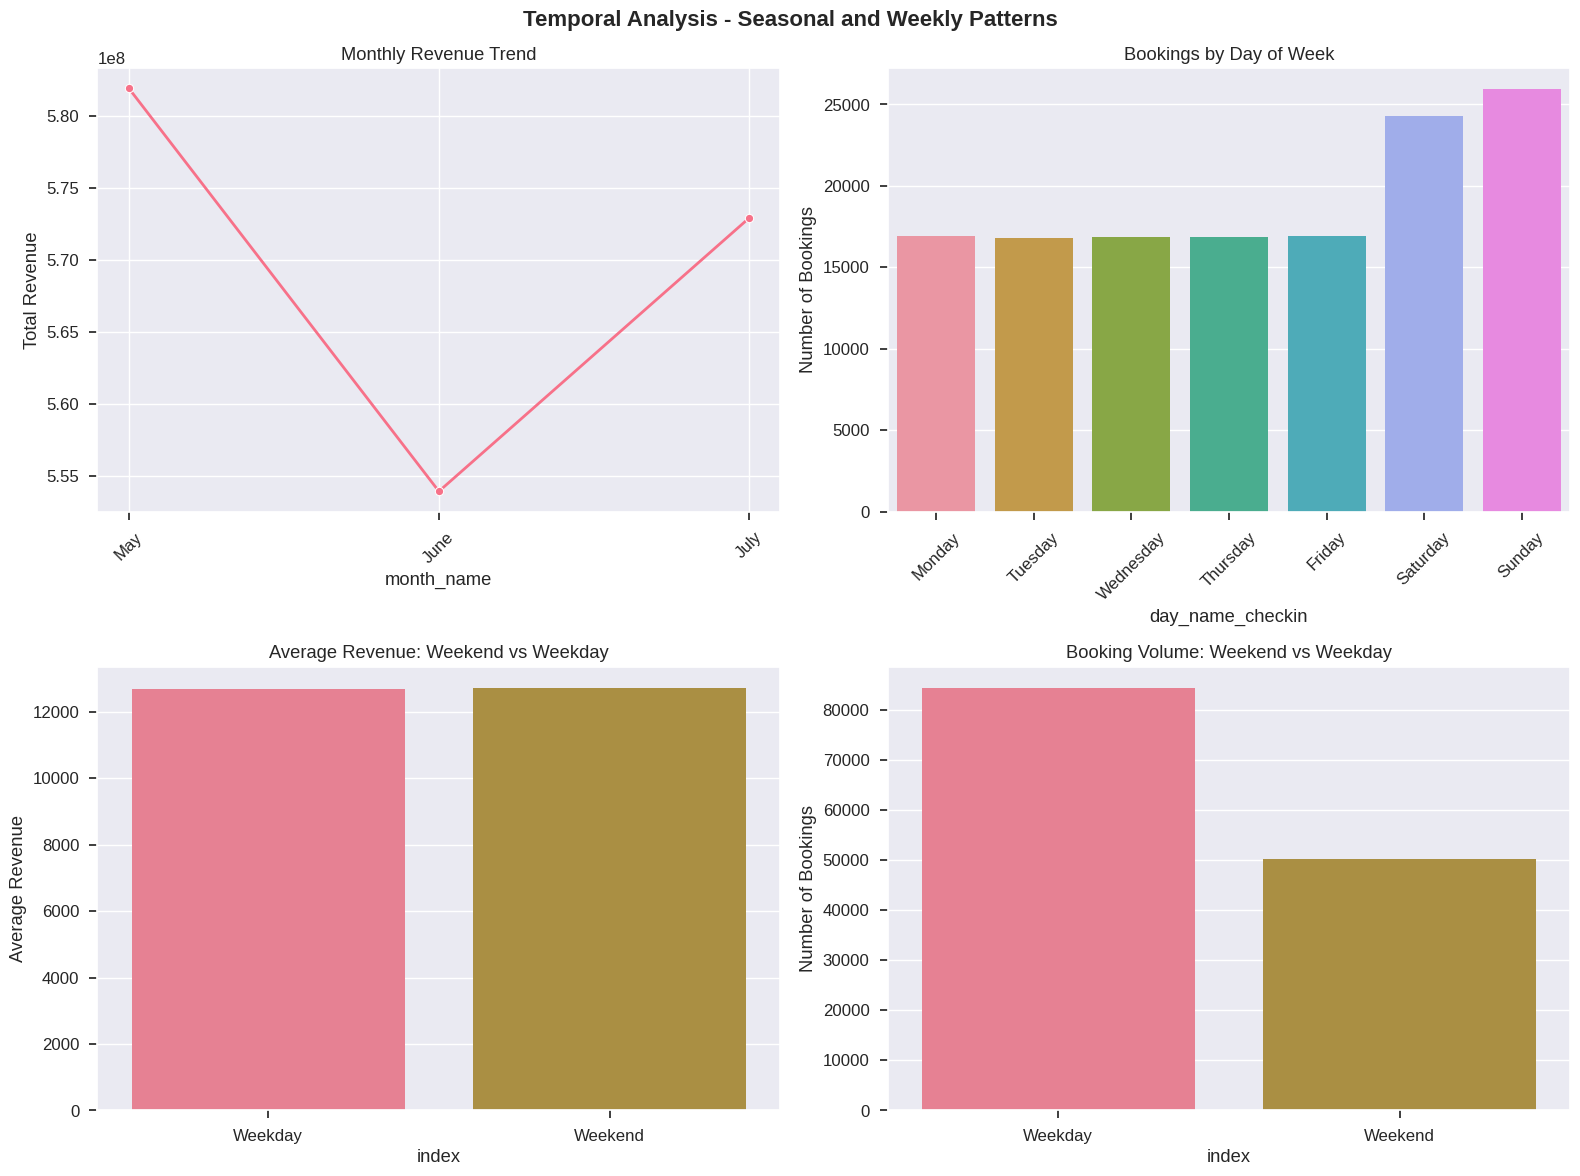

Temporal Analysis Summary:
Monthly Performance:
            booking_id  revenue_realized
month_name                              
July             45025         572908208
June             43683         553932355
May              45882         581930666

Weekend vs Weekday Analysis:
         revenue_realized  booking_id  ratings_given
Weekday          12679.47       84365           1.18
Weekend          12724.09       50225           1.18


In [43]:
print("\n=== TEMPORAL ANALYSIS ===")

# Check for date columns
date_columns = ['check_in_date', 'month_name', 'day_name_checkin', 'is_weekend_checkin']
available_date_cols = [col for col in date_columns if col in fact_bookings.columns]

if available_date_cols:
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Temporal Analysis - Seasonal and Weekly Patterns', fontsize=16, fontweight='bold')
    
    # 1. Monthly Revenue Trends
    if 'month_name' in fact_bookings.columns:
        monthly_revenue = fact_bookings.groupby('month_name')['revenue_realized'].sum()
        month_order = ['May', 'June', 'July']  # Based on dataset
        monthly_revenue = monthly_revenue.reindex([m for m in month_order if m in monthly_revenue.index])
        
        sns.lineplot(data=monthly_revenue.reset_index(), 
                    x='month_name', y='revenue_realized', 
                    marker='o', linewidth=2, ax=axes[0,0])
        axes[0,0].set_title('Monthly Revenue Trend')
        axes[0,0].set_ylabel('Total Revenue')
        axes[0,0].tick_params(axis='x', rotation=45)
    
    # 2. Weekly Patterns
    if 'day_name_checkin' in fact_bookings.columns:
        # Define day order
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        daily_bookings = fact_bookings['day_name_checkin'].value_counts()
        daily_bookings = daily_bookings.reindex([d for d in day_order if d in daily_bookings.index])
        
        sns.barplot(x=daily_bookings.index, y=daily_bookings.values, ax=axes[0,1])
        axes[0,1].set_title('Bookings by Day of Week')
        axes[0,1].set_ylabel('Number of Bookings')
        axes[0,1].tick_params(axis='x', rotation=45)
    
    # 3. Weekend vs Weekday Analysis
    if 'is_weekend_checkin' in fact_bookings.columns:
        weekend_analysis = fact_bookings.groupby('is_weekend_checkin').agg({
            'revenue_realized': 'mean',
            'booking_id': 'count',
            'ratings_given': 'mean' if 'ratings_given' in fact_bookings.columns else 'count'
        }).round(2)
        
        weekend_analysis.index = ['Weekday', 'Weekend']
        
        # Revenue comparison
        sns.barplot(data=weekend_analysis.reset_index(), 
                    x='index', y='revenue_realized', ax=axes[1,0])
        axes[1,0].set_title('Average Revenue: Weekend vs Weekday')
        axes[1,0].set_ylabel('Average Revenue')
        
        # Booking volume comparison
        sns.barplot(data=weekend_analysis.reset_index(), 
                    x='index', y='booking_id', ax=axes[1,1])
        axes[1,1].set_title('Booking Volume: Weekend vs Weekday')
        axes[1,1].set_ylabel('Number of Bookings')
    
    plt.tight_layout()
    plt.show()
    
    # Temporal insights
    print("Temporal Analysis Summary:")
    if 'month_name' in fact_bookings.columns:
        monthly_stats = fact_bookings.groupby('month_name').agg({
            'booking_id': 'count',
            'revenue_realized': 'sum'
        }).round(2)
        print("Monthly Performance:")
        print(monthly_stats)
    
    if 'is_weekend_checkin' in fact_bookings.columns:
        print(f"\nWeekend vs Weekday Analysis:")
        print(weekend_analysis)

else:
    print("❌ Date columns not available for temporal analysis")


7. Root Cause Analysis Summary Dashboard



ROOT CAUSE ANALYSIS - EXECUTIVE SUMMARY


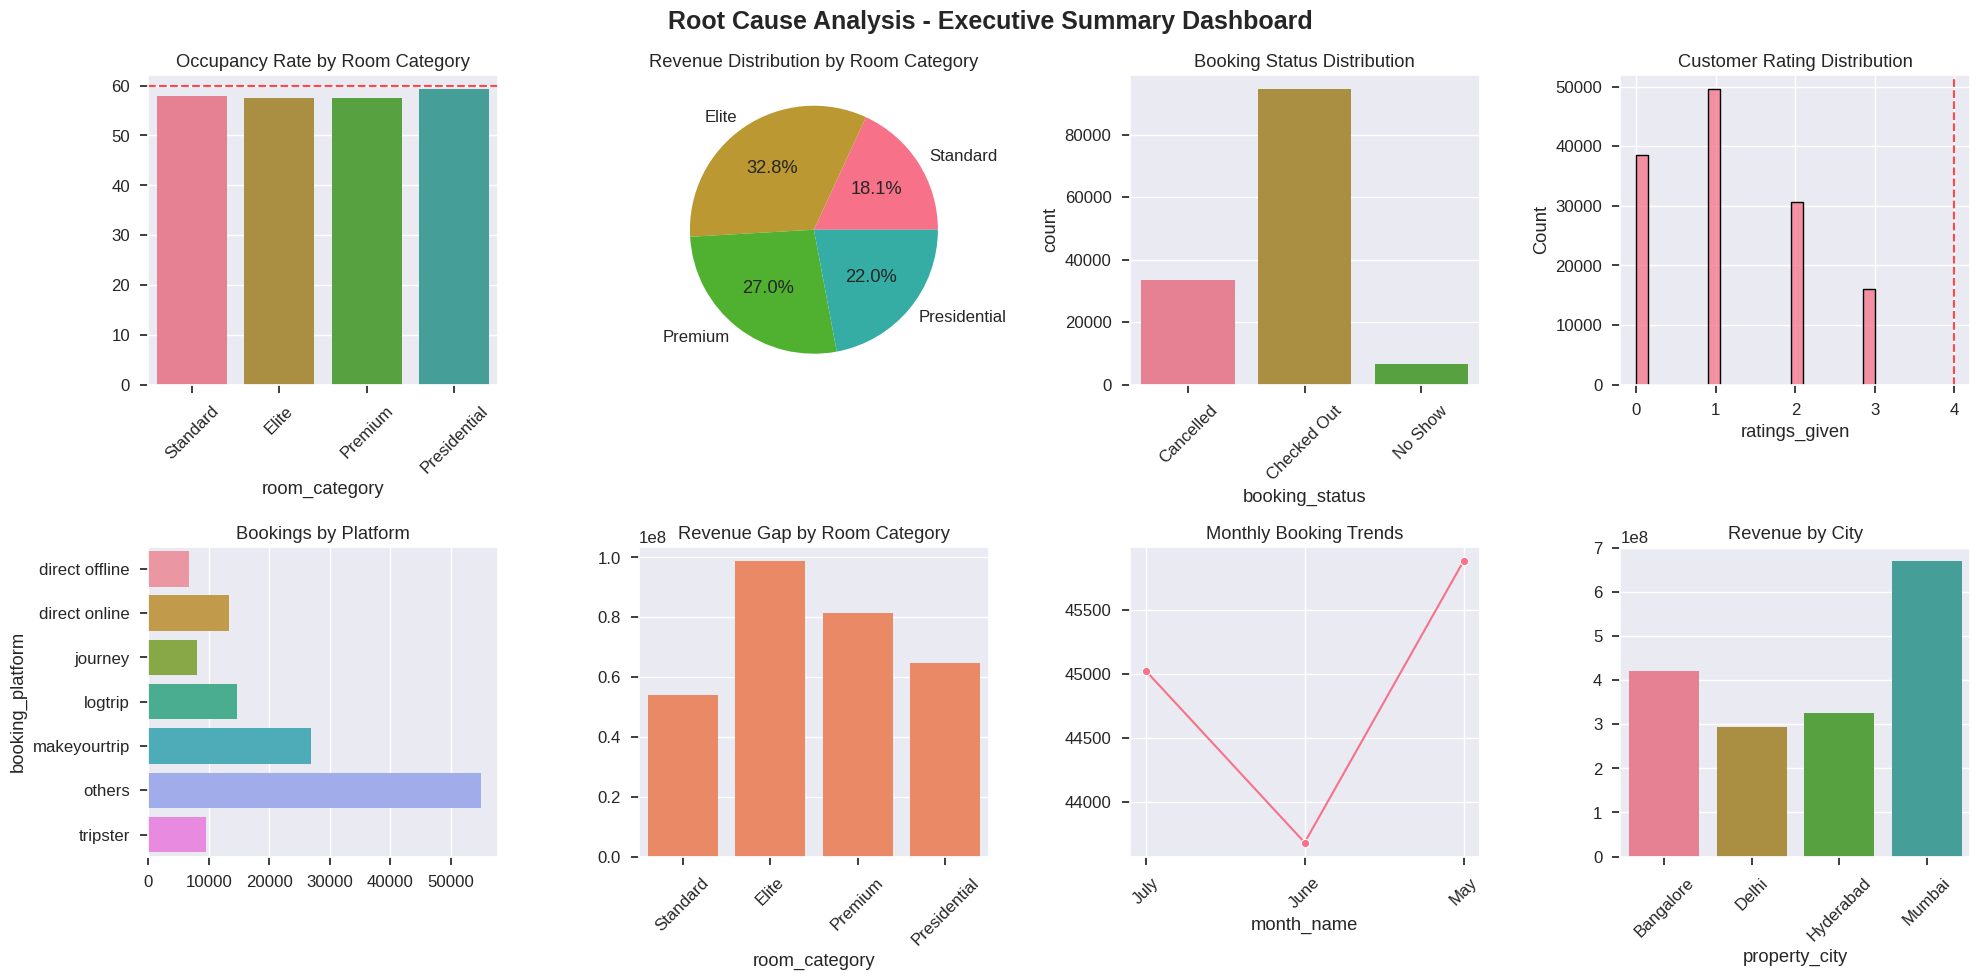


📊 KEY PERFORMANCE INDICATORS:
--------------------------------------------------
Overall Occupancy Rate........ 57.9%
Total Revenue................. 1,708,771,229
Avg Revenue per Booking....... 12696.12
Cancellation Rate............. 24.8%
Average Rating................ 1.18/5.0
High Ratings (4.0+)........... 0.0%
Top Platform.................. others (40.9%)
Total Revenue Gap............. 298,774,986
Avg Revenue Gap............... 2219.89

🎯 CRITICAL ROOT CAUSE AREAS IDENTIFIED:
--------------------------------------------------
1. Low Occupancy: Standard, Elite, Premium, Presidential rooms below 60%
2. High Cancellation Rate: 24.8% cancellations
3. Low Customer Satisfaction: 1.18/5.0 average rating
4. Significant Revenue Leakage: Avg gap of 2219.89

💡 RECOMMENDED IMMEDIATE ACTIONS:
--------------------------------------------------
1. Focus on underperforming room categories for capacity optimization
2. Investigate high cancellation rates and implement retention strategies
3. Addres

In [44]:
print("\n" + "="*80)
print("ROOT CAUSE ANALYSIS - EXECUTIVE SUMMARY")
print("="*80)

# Create summary dashboard
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Root Cause Analysis - Executive Summary Dashboard', fontsize=18, fontweight='bold')

# Initialize summary metrics
summary_metrics = {}

# 1. Overall Occupancy Rate
if 'room_category' in fact_aggregated_bookings.columns:
    overall_occupancy = (fact_aggregated_bookings['successful_bookings'].sum() / 
                        fact_aggregated_bookings['capacity'].sum()) * 100
    summary_metrics['Overall Occupancy Rate'] = f"{overall_occupancy:.1f}%"
    
    # Occupancy by category
    room_occupancy = fact_aggregated_bookings.groupby('room_category').apply(
        lambda x: (x['successful_bookings'].sum() / x['capacity'].sum()) * 100
    )
    
    sns.barplot(x=room_occupancy.index, y=room_occupancy.values, ax=axes[0,0])
    axes[0,0].set_title('Occupancy Rate by Room Category')
    axes[0,0].axhline(y=60, color='red', linestyle='--', alpha=0.7)
    axes[0,0].tick_params(axis='x', rotation=45)

# 2. Revenue Performance
if 'revenue_realized' in fact_bookings.columns:
    total_revenue = fact_bookings['revenue_realized'].sum()
    avg_revenue_per_booking = fact_bookings['revenue_realized'].mean()
    summary_metrics['Total Revenue'] = f"{total_revenue:,.0f}"
    summary_metrics['Avg Revenue per Booking'] = f"{avg_revenue_per_booking:.2f}"
    
    # Revenue by room category
    revenue_by_category = fact_bookings.groupby('room_category')['revenue_realized'].sum()
    
    axes[0,1].pie(revenue_by_category.values, labels=revenue_by_category.index, autopct='%1.1f%%')
    axes[0,1].set_title('Revenue Distribution by Room Category')

# 3. Cancellation Analysis
if 'booking_status' in fact_bookings.columns:
    status_counts = fact_bookings['booking_status'].value_counts(normalize=True) * 100
    
    if 'Cancelled' in status_counts:
        cancellation_rate = status_counts['Cancelled']
        summary_metrics['Cancellation Rate'] = f"{cancellation_rate:.1f}%"
    
    sns.countplot(data=fact_bookings, x='booking_status', ax=axes[0,2])
    axes[0,2].set_title('Booking Status Distribution')
    axes[0,2].tick_params(axis='x', rotation=45)

# 4. Customer Satisfaction
if 'ratings_given' in fact_bookings.columns:
    avg_rating = fact_bookings['ratings_given'].mean()
    high_rating_pct = (fact_bookings['ratings_given'] >= 4.0).mean() * 100
    summary_metrics['Average Rating'] = f"{avg_rating:.2f}/5.0"
    summary_metrics['High Ratings (4.0+)'] = f"{high_rating_pct:.1f}%"
    
    # Rating distribution
    sns.histplot(data=fact_bookings, x='ratings_given', bins=20, ax=axes[0,3])
    axes[0,3].set_title('Customer Rating Distribution')
    axes[0,3].axvline(x=4.0, color='red', linestyle='--', alpha=0.7)

# 5. Platform Performance
if 'booking_platform' in fact_bookings.columns:
    platform_counts = fact_bookings['booking_platform'].value_counts()
    top_platform = platform_counts.index[0]
    top_platform_share = (platform_counts.iloc[0] / len(fact_bookings)) * 100
    summary_metrics['Top Platform'] = f"{top_platform} ({top_platform_share:.1f}%)"
    
    sns.barplot(x=platform_counts.values, y=platform_counts.index, ax=axes[1,0])
    axes[1,0].set_title('Bookings by Platform')

# 6. Revenue Gap Analysis
if 'revenue_gap' in fact_bookings.columns:
    total_revenue_gap = fact_bookings['revenue_gap'].sum()
    avg_revenue_gap = fact_bookings['revenue_gap'].mean()
    summary_metrics['Total Revenue Gap'] = f"{total_revenue_gap:,.0f}"
    summary_metrics['Avg Revenue Gap'] = f"{avg_revenue_gap:.2f}"
    
    # Gap by room category
    gap_by_category = fact_bookings.groupby('room_category')['revenue_gap'].sum()
    sns.barplot(x=gap_by_category.index, y=gap_by_category.values, ax=axes[1,1], color='coral')
    axes[1,1].set_title('Revenue Gap by Room Category')
    axes[1,1].tick_params(axis='x', rotation=45)

# 7. Temporal Trends
if 'month_name' in fact_bookings.columns:
    monthly_bookings = fact_bookings.groupby('month_name').size()
    sns.lineplot(x=monthly_bookings.index, y=monthly_bookings.values, 
                marker='o', ax=axes[1,2])
    axes[1,2].set_title('Monthly Booking Trends')
    axes[1,2].tick_params(axis='x', rotation=45)

# 8. Property Performance
if 'property_city' in fact_bookings.columns:
    city_performance = fact_bookings.groupby('property_city')['revenue_realized'].sum()
    sns.barplot(x=city_performance.index, y=city_performance.values, ax=axes[1,3])
    axes[1,3].set_title('Revenue by City')
    axes[1,3].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print Executive Summary
print("\n📊 KEY PERFORMANCE INDICATORS:")
print("-" * 50)
for metric, value in summary_metrics.items():
    print(f"{metric:.<30} {value}")

print(f"\n🎯 CRITICAL ROOT CAUSE AREAS IDENTIFIED:")
print("-" * 50)

# Identify critical issues
critical_issues = []

# Check occupancy issues
if 'room_category' in fact_aggregated_bookings.columns:
    low_occupancy_rooms = room_occupancy[room_occupancy < 60]
    if not low_occupancy_rooms.empty:
        critical_issues.append(f"Low Occupancy: {', '.join(low_occupancy_rooms.index)} rooms below 60%")

# Check cancellation issues
if 'booking_status' in fact_bookings.columns and 'Cancelled' in status_counts:
    if status_counts['Cancelled'] > 20:  # Above 20% cancellation
        critical_issues.append(f"High Cancellation Rate: {status_counts['Cancelled']:.1f}% cancellations")

# Check satisfaction issues
if 'ratings_given' in fact_bookings.columns:
    if avg_rating < 3.5:
        critical_issues.append(f"Low Customer Satisfaction: {avg_rating:.2f}/5.0 average rating")

# Check revenue gap issues
if 'revenue_gap' in fact_bookings.columns:
    if avg_revenue_gap > 100:  # Threshold for significant gap
        critical_issues.append(f"Significant Revenue Leakage: Avg gap of {avg_revenue_gap:.2f}")

# Display critical issues
for i, issue in enumerate(critical_issues, 1):
    print(f"{i}. {issue}")

if not critical_issues:
    print("✅ No critical issues identified - Performance within acceptable ranges")

print(f"\n💡 RECOMMENDED IMMEDIATE ACTIONS:")
print("-" * 50)
print("1. Focus on underperforming room categories for capacity optimization")
print("2. Investigate high cancellation rates and implement retention strategies")
print("3. Address customer satisfaction issues in low-rated categories")
print("4. Optimize pricing strategies to reduce revenue gaps")
print("5. Enhance performance of underperforming booking platforms")
print("6. Implement dynamic pricing based on seasonal patterns")

print("\n" + "="*80)
